## Before Lecture

- Final Exam time: Maybe 2-3pm due to Andy's subject in th emorning.
- Time to **write** your project.
- Assignment 4 reflection: PCA has an ELBOW, too
- Best assignment presentation
- Kmean in action

# House Keeping

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import patsy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
from sklearn.linear_model import LassoCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, KFold, train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions



# Reading

1. Textbook Page 201-230


# Congressional factors

We can also find simple patterns among congressional [votes](https://voteview.com/) of legislators (coming from two separate tables here, often more efficient).

Details are on Page 216.
- 2009-2010
- 445 voting members
- 1647 questions. $-1$ for nea, $+1$ for yea and $0$ for abstain or absence.

If only one component as *partisan and ideological*,
$$E[x_{ij}]=\varphi_{1j}\nu_{i1},$$
where $\nu_{i1}$ is voter $i$'s score (partisanship strength), and $\varphi_{1j}$ is the parameter/characteristic of vote $j$. The LHS $x_{ij}$ is voter $i$'s decision on vote question $j$. Obviusly,
- $i=1,...,445$
- $j=1,...,1647$

In [2]:
votes = pd.read_csv("https://www.dropbox.com/s/pb6bf9h48yd17pm/rollcall-votes.csv?dl=1")
legis = pd.read_csv("https://www.dropbox.com/s/mdoituwbpkeft0q/rollcall-members.csv?dl=1")

## Understand data

In [3]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, BONNER (R AL-1) to LUMMIS (R WY-1)
Columns: 1647 entries, Vote 1 to Vote 1647
dtypes: int64(1647)
memory usage: 5.6+ MB


In [4]:
votes.head()

,Vote 1,Vote 2,Vote 3,Vote 4,Vote 5,Vote 6,Vote 7,Vote 8,Vote 9,Vote 10,...,Vote 1638,Vote 1639,Vote 1640,Vote 1641,Vote 1642,Vote 1643,Vote 1644,Vote 1645,Vote 1646,Vote 1647
BONNER (R AL-1),-1,1,-1,0,0,1,-1,-1,1,1,...,-1,0,-1,-1,-1,-1,0,1,1,0
BRIGHT (D AL-2),1,-1,1,1,1,1,-1,-1,1,1,...,1,1,0,0,0,0,0,0,0,0
ROGERS (R AL-3),-1,1,-1,-1,-1,1,-1,-1,1,1,...,-1,-1,-1,-1,-1,1,-1,-1,1,1
ADERHOLT (R AL-4),-1,1,-1,-1,1,1,-1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
GRIFFITH (D/R AL-5),1,-1,1,1,1,-1,-1,-1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
legis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   member  445 non-null    object
 1   state   445 non-null    object
 2   party   445 non-null    object
dtypes: object(3)
memory usage: 10.6+ KB


In [6]:
legis.head()

,member,state,party
0,BONNER (R AL-1),AL,R
1,BRIGHT (D AL-2),AL,D
2,ROGERS (R AL-3),AL,R
3,ADERHOLT (R AL-4),AL,R
4,GRIFFITH (D/R AL-5),AL,DR


## PCA and Scree Plot

In [7]:
scaler = StandardScaler()
votes_scaled = scaler.fit_transform(votes)

In [8]:
pca = PCA()
votes_v = pca.fit_transform(votes_scaled)

In [9]:
votes_v.shape

(445, 445)

In [10]:
votes_v = pd.DataFrame(votes_v)
votes_v.index = votes.index
votes_v.head(20)

,0,1,2,3,4,5,6,7,8,9,...,435,436,437,438,439,440,441,442,443,444
BONNER (R AL-1),26.540539,3.416646,-3.417180,8.273448,-0.485417,-3.304371,1.606005,-7.839717,-2.149109,-2.569238,...,0.095864,-0.064414,0.100015,0.025049,0.044113,0.061535,0.053730,0.001473,0.108623,3.822055e-15
BRIGHT (D AL-2),9.130025,5.358920,-0.638048,1.192764,0.186730,8.682080,-4.325404,4.741924,0.957423,-0.321414,...,-0.049506,-0.041137,-0.016326,-0.036502,0.010771,0.040841,-0.046459,-0.038205,-0.002339,3.822055e-15
ROGERS (R AL-3),24.602280,9.951457,-2.657572,9.747331,-4.368249,-3.951281,0.942972,-4.898402,1.567067,1.751680,...,0.077117,-0.193055,0.328651,-0.040641,0.039390,0.227494,-0.119721,0.086823,-0.094445,3.822055e-15
ADERHOLT (R AL-4),26.067653,6.182540,-0.749175,9.627170,-4.293297,-3.625632,5.391959,-7.166128,2.156540,0.589580,...,0.057797,-0.111618,0.063279,0.114422,0.009223,-0.178063,0.021200,-0.098998,0.015233,3.822055e-15
GRIFFITH (D/R AL-5),4.592154,1.066587,-11.957255,4.518397,-7.177799,3.543858,-7.156843,-1.565243,2.081654,1.546956,...,0.109586,-0.141905,-0.063237,0.070785,-0.043402,0.114566,-0.074475,-0.039301,-0.066218,3.822055e-15
BACHUS (R AL-6),27.472382,6.685749,-3.107795,7.301833,-2.885374,-3.572546,1.183899,-6.132018,3.263754,0.068292,...,-0.011648,0.187119,-0.113840,-0.010205,-0.046336,-0.086233,0.029972,0.086574,-0.171636,3.822055e-15
DAVIS (D AL-7),-13.754717,-22.198156,-21.542989,-0.400192,0.381510,6.952107,2.701277,-3.362566,-11.537771,-1.668860,...,-0.041964,-0.027197,-0.048361,0.111249,-0.028035,-0.050374,-0.067888,-0.004671,0.006316,3.822055e-15
YOUNG (R AK-1),20.025641,-11.933299,-10.223957,1.777432,-15.411944,-2.906468,2.099439,-3.502393,6.443671,-6.513873,...,-0.009267,0.063056,-0.073848,-0.074277,0.022894,0.001623,-0.033302,0.088542,-0.024267,3.822055e-15
KIRKPATRICK (D AZ-1),-8.185386,4.061386,-3.208021,2.767079,-4.338521,7.195523,-2.077490,1.295458,-2.739554,-1.247484,...,0.099307,0.090931,-0.013776,0.153682,-0.044217,0.062735,0.091543,0.007359,-0.025434,3.822055e-15
FRANKS (R AZ-2),37.270325,2.315443,7.358580,-16.071661,-3.402516,2.579236,1.995463,-4.265981,0.168629,2.646847,...,0.269565,0.106317,-0.054760,0.051908,-0.136048,-0.122485,0.095745,-0.002229,0.040748,3.822055e-15


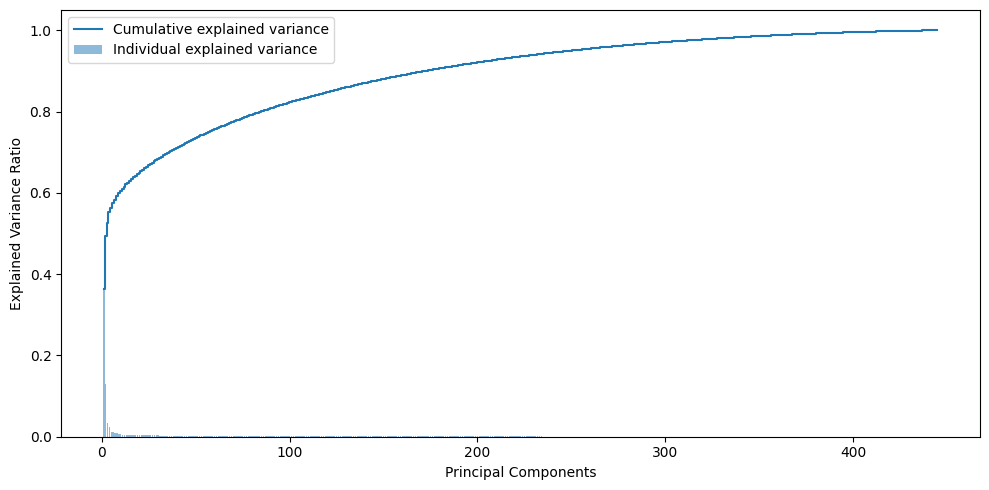

In [11]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.bar(range(1,len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(explained_variance)+1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Elbow

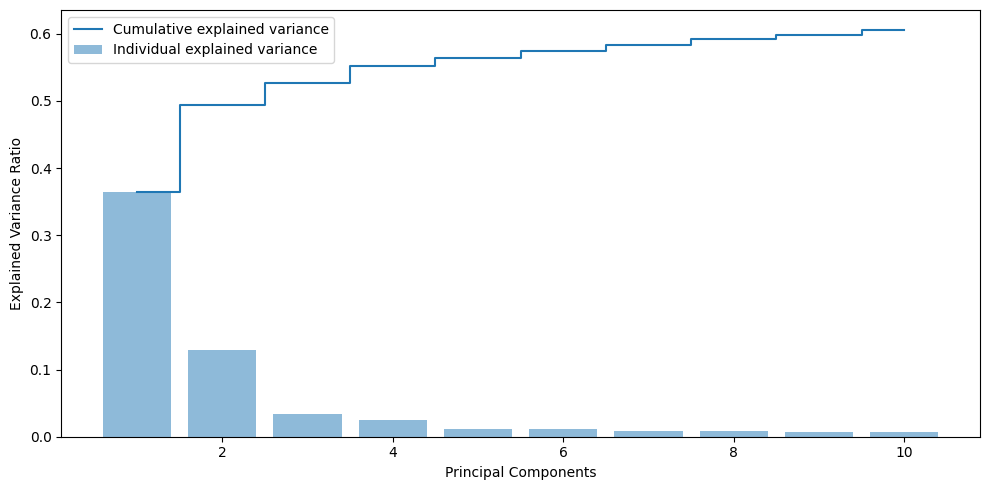

In [12]:
explained_variance = pca.explained_variance_ratio_[0:10]

plt.figure(figsize=(10,5))
plt.bar(range(1,len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(explained_variance)+1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

$\color{red}{Question:}$ what if you do not scale the data? What does the scree plot look like?

## Visualisation and Interpretation

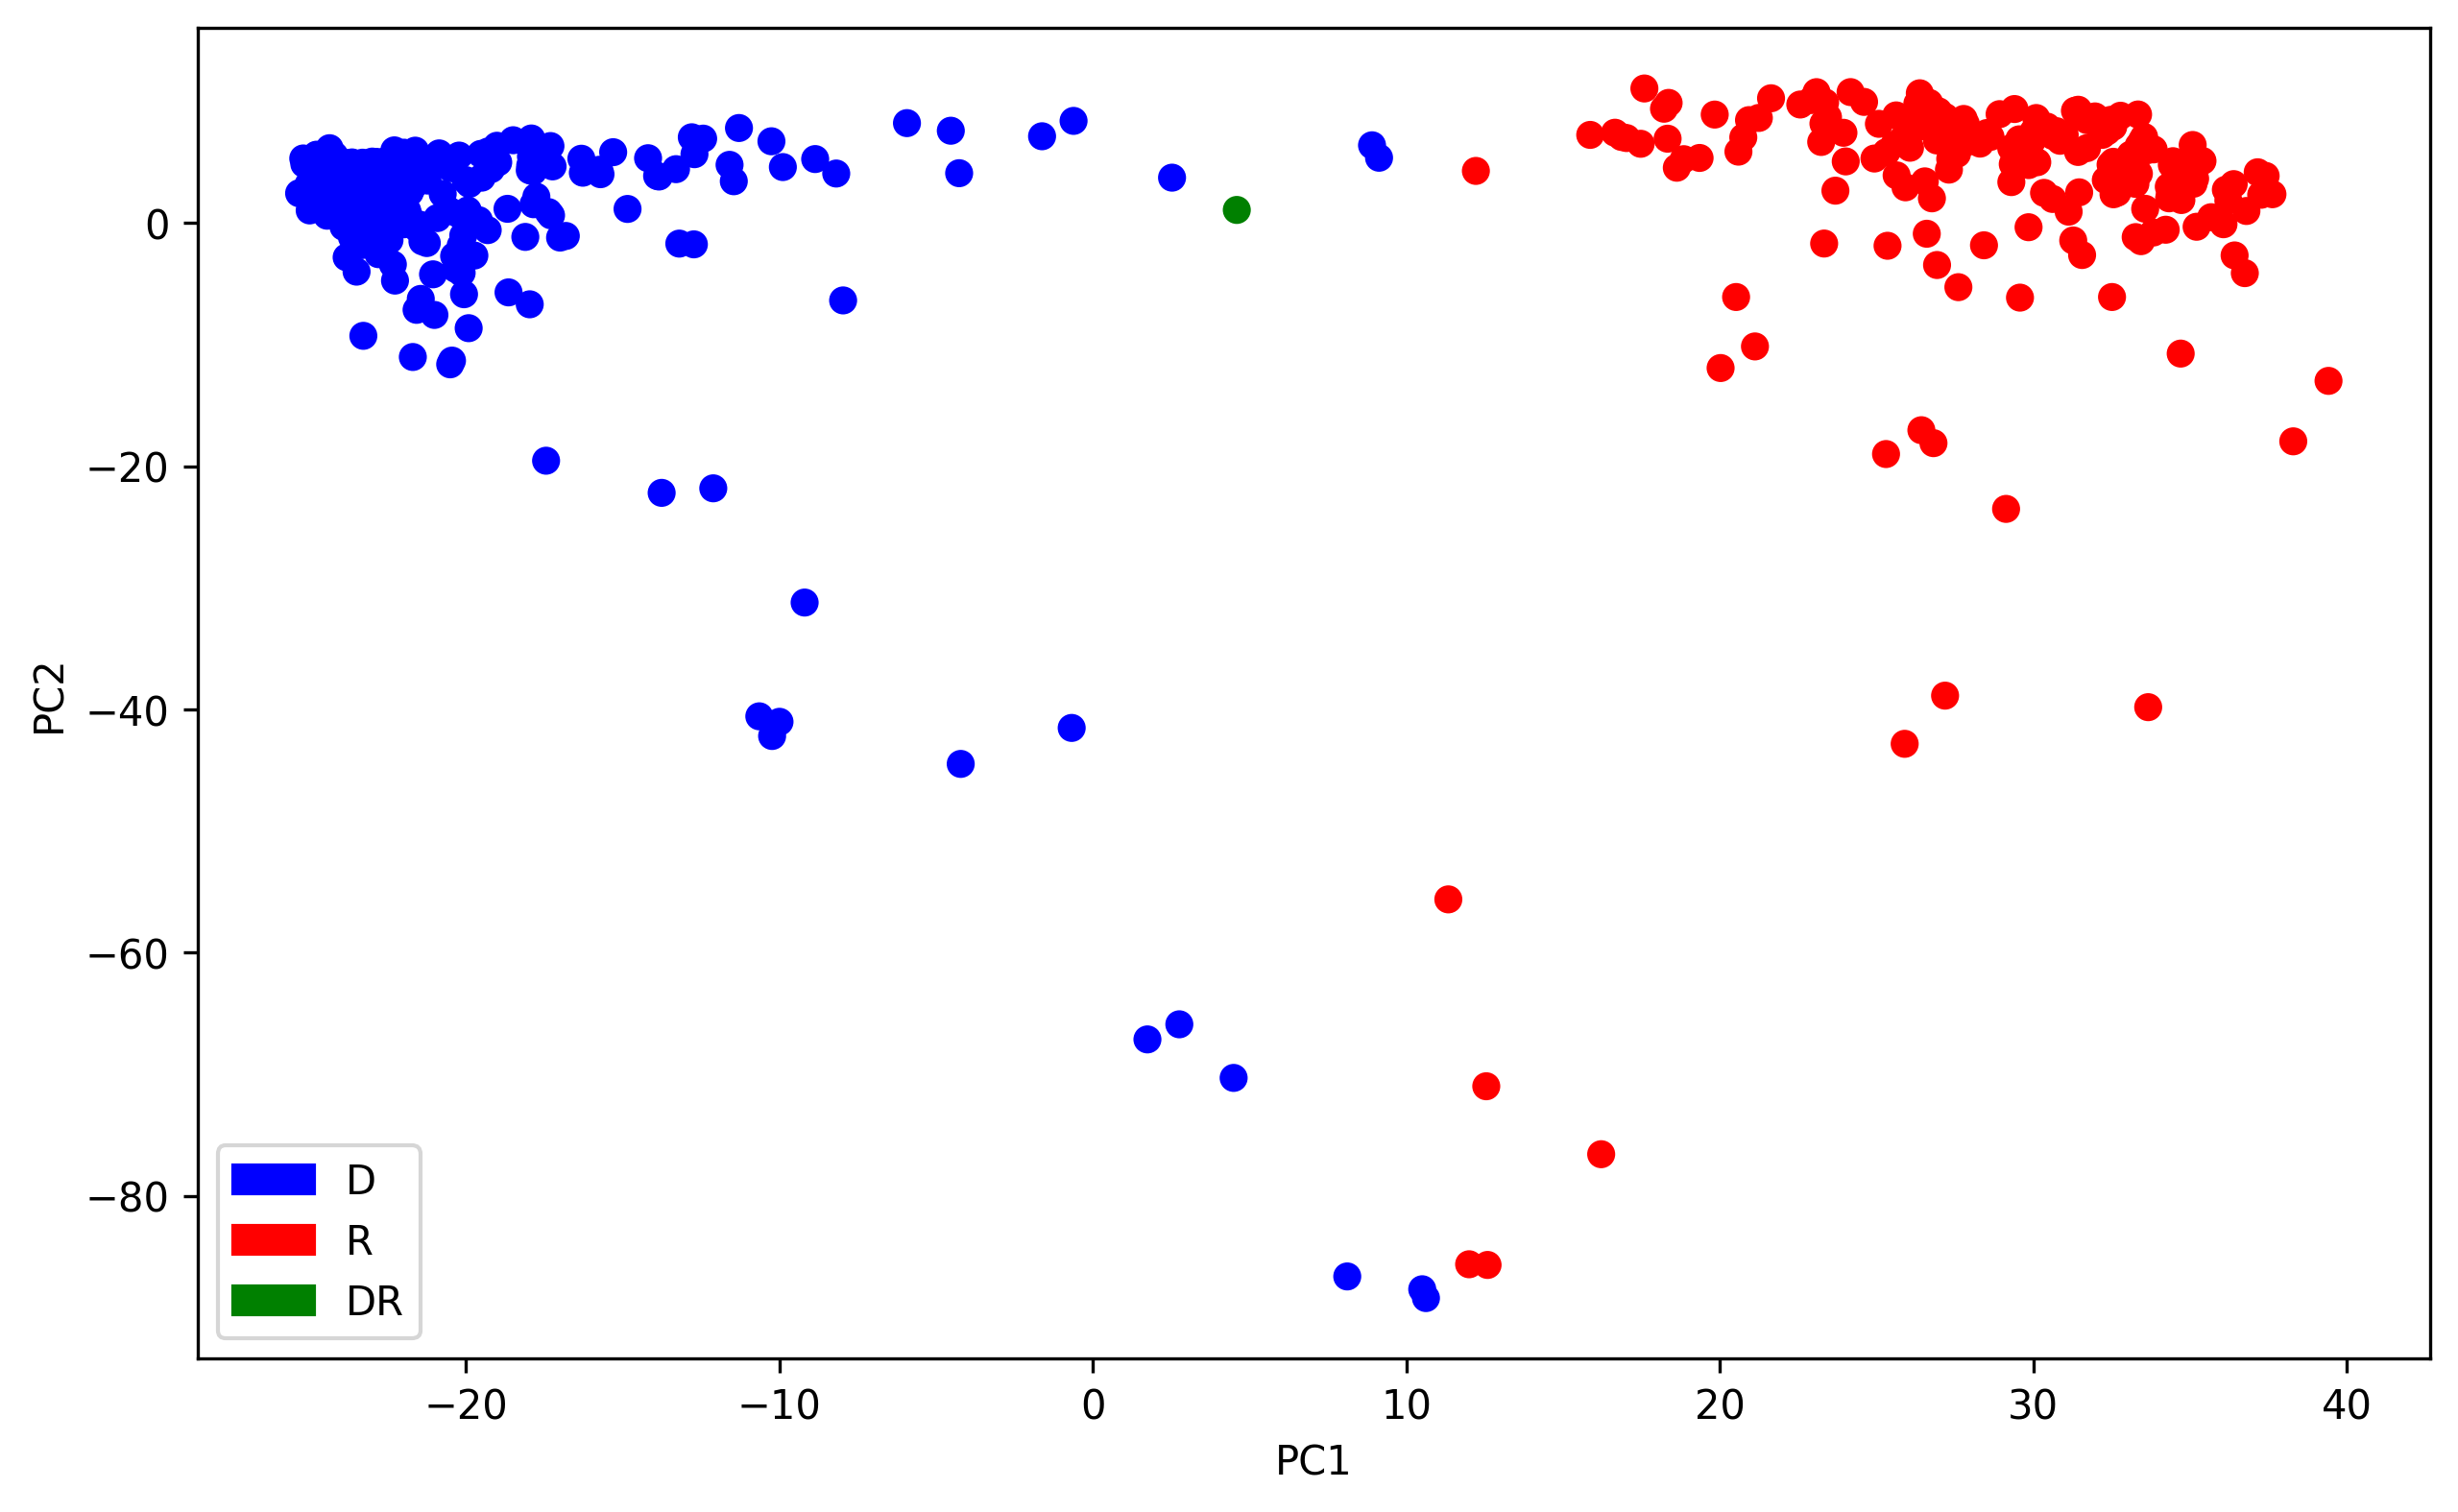

In [13]:
import matplotlib.patches as mpatches
colors = {'D':'blue', 'R':'red', 'DR': 'green'}

plt.figure(figsize=(10, 6), dpi=300)
scatter = plt.scatter(votes_v[0], votes_v[1], c=legis['party'].map(colors), marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('')

patches = [mpatches.Patch(color=v, label=k) for k, v in colors.items()]
plt.legend(handles=patches)

plt.show()

*Sometimes* (e.g., last year), this figure is the upside-down and leftside-right of the textbook. This is fine because PCs do not care about signs. Although we do if interpretation is needed.

A good luck is that we make the left on the left and right on the right, which is just right.

For the **top-down** approach (check $\nu_i$), you can investigate the extreme scores for the politicians:

After observing these names, for the first PC:
- +ve means far-right (very conservative)
- -ve means far-left.
- This certainly requires the field knowledge
and shows your real value.

In [14]:
print(votes_v.iloc[votes_v.iloc[:, 0].argsort().head(5), 0])

EDWARDS (D MD-4)    -25.319974
PRICE (D NC-4)      -25.187432
MATSUI (D CA-5)     -25.153090
SCHAKOWS (D IL-9)   -25.015668
HIRONO (D HI-2)     -25.013586
Name: 0, dtype: float64


In [15]:
print(votes_v.iloc[votes_v.iloc[:, 0].argsort().tail(5), 0])

FRANKS (R AZ-2)       37.270325
LAMBORN (R CO-5)      37.412382
HENSARLIN (R TX-5)    37.629364
FLAKE (R AZ-6)        38.293722
BROUN (R GA-10)       39.418256
Name: 0, dtype: float64


At least domain experts could recognize partisan politicians on the two extremes above. But what about the second component?

In [16]:
print(votes_v.iloc[votes_v.iloc[:, 1].argsort().head(5), 1])

SOLIS (D CA-32)        -88.412905
GILLIBRAND (D NY-20)   -87.687297
PELOSI (D CA-8)        -86.633251
STUTZMAN (R IN-3)      -85.688506
REED (R NY-29)         -85.632634
Name: 1, dtype: float64


In [17]:
print(votes_v.iloc[votes_v.iloc[:, 1].argsort().tail(5), 1])

BIGGERT (R IL-13)    10.250116
GUTHRIE (R KY-2)     10.660683
LANCE (R NJ-7)       10.752152
UPTON (R MI-6)       10.756088
LOBIONDO (R NJ-2)    11.054953
Name: 1, dtype: float64


For the **bottoms-up** (check $\varphi$) approach, you should look at the loadings on the votes.

In [18]:
votes_phi = pca.components_[0:2, :]
votes_phi.shape

(2, 1647)

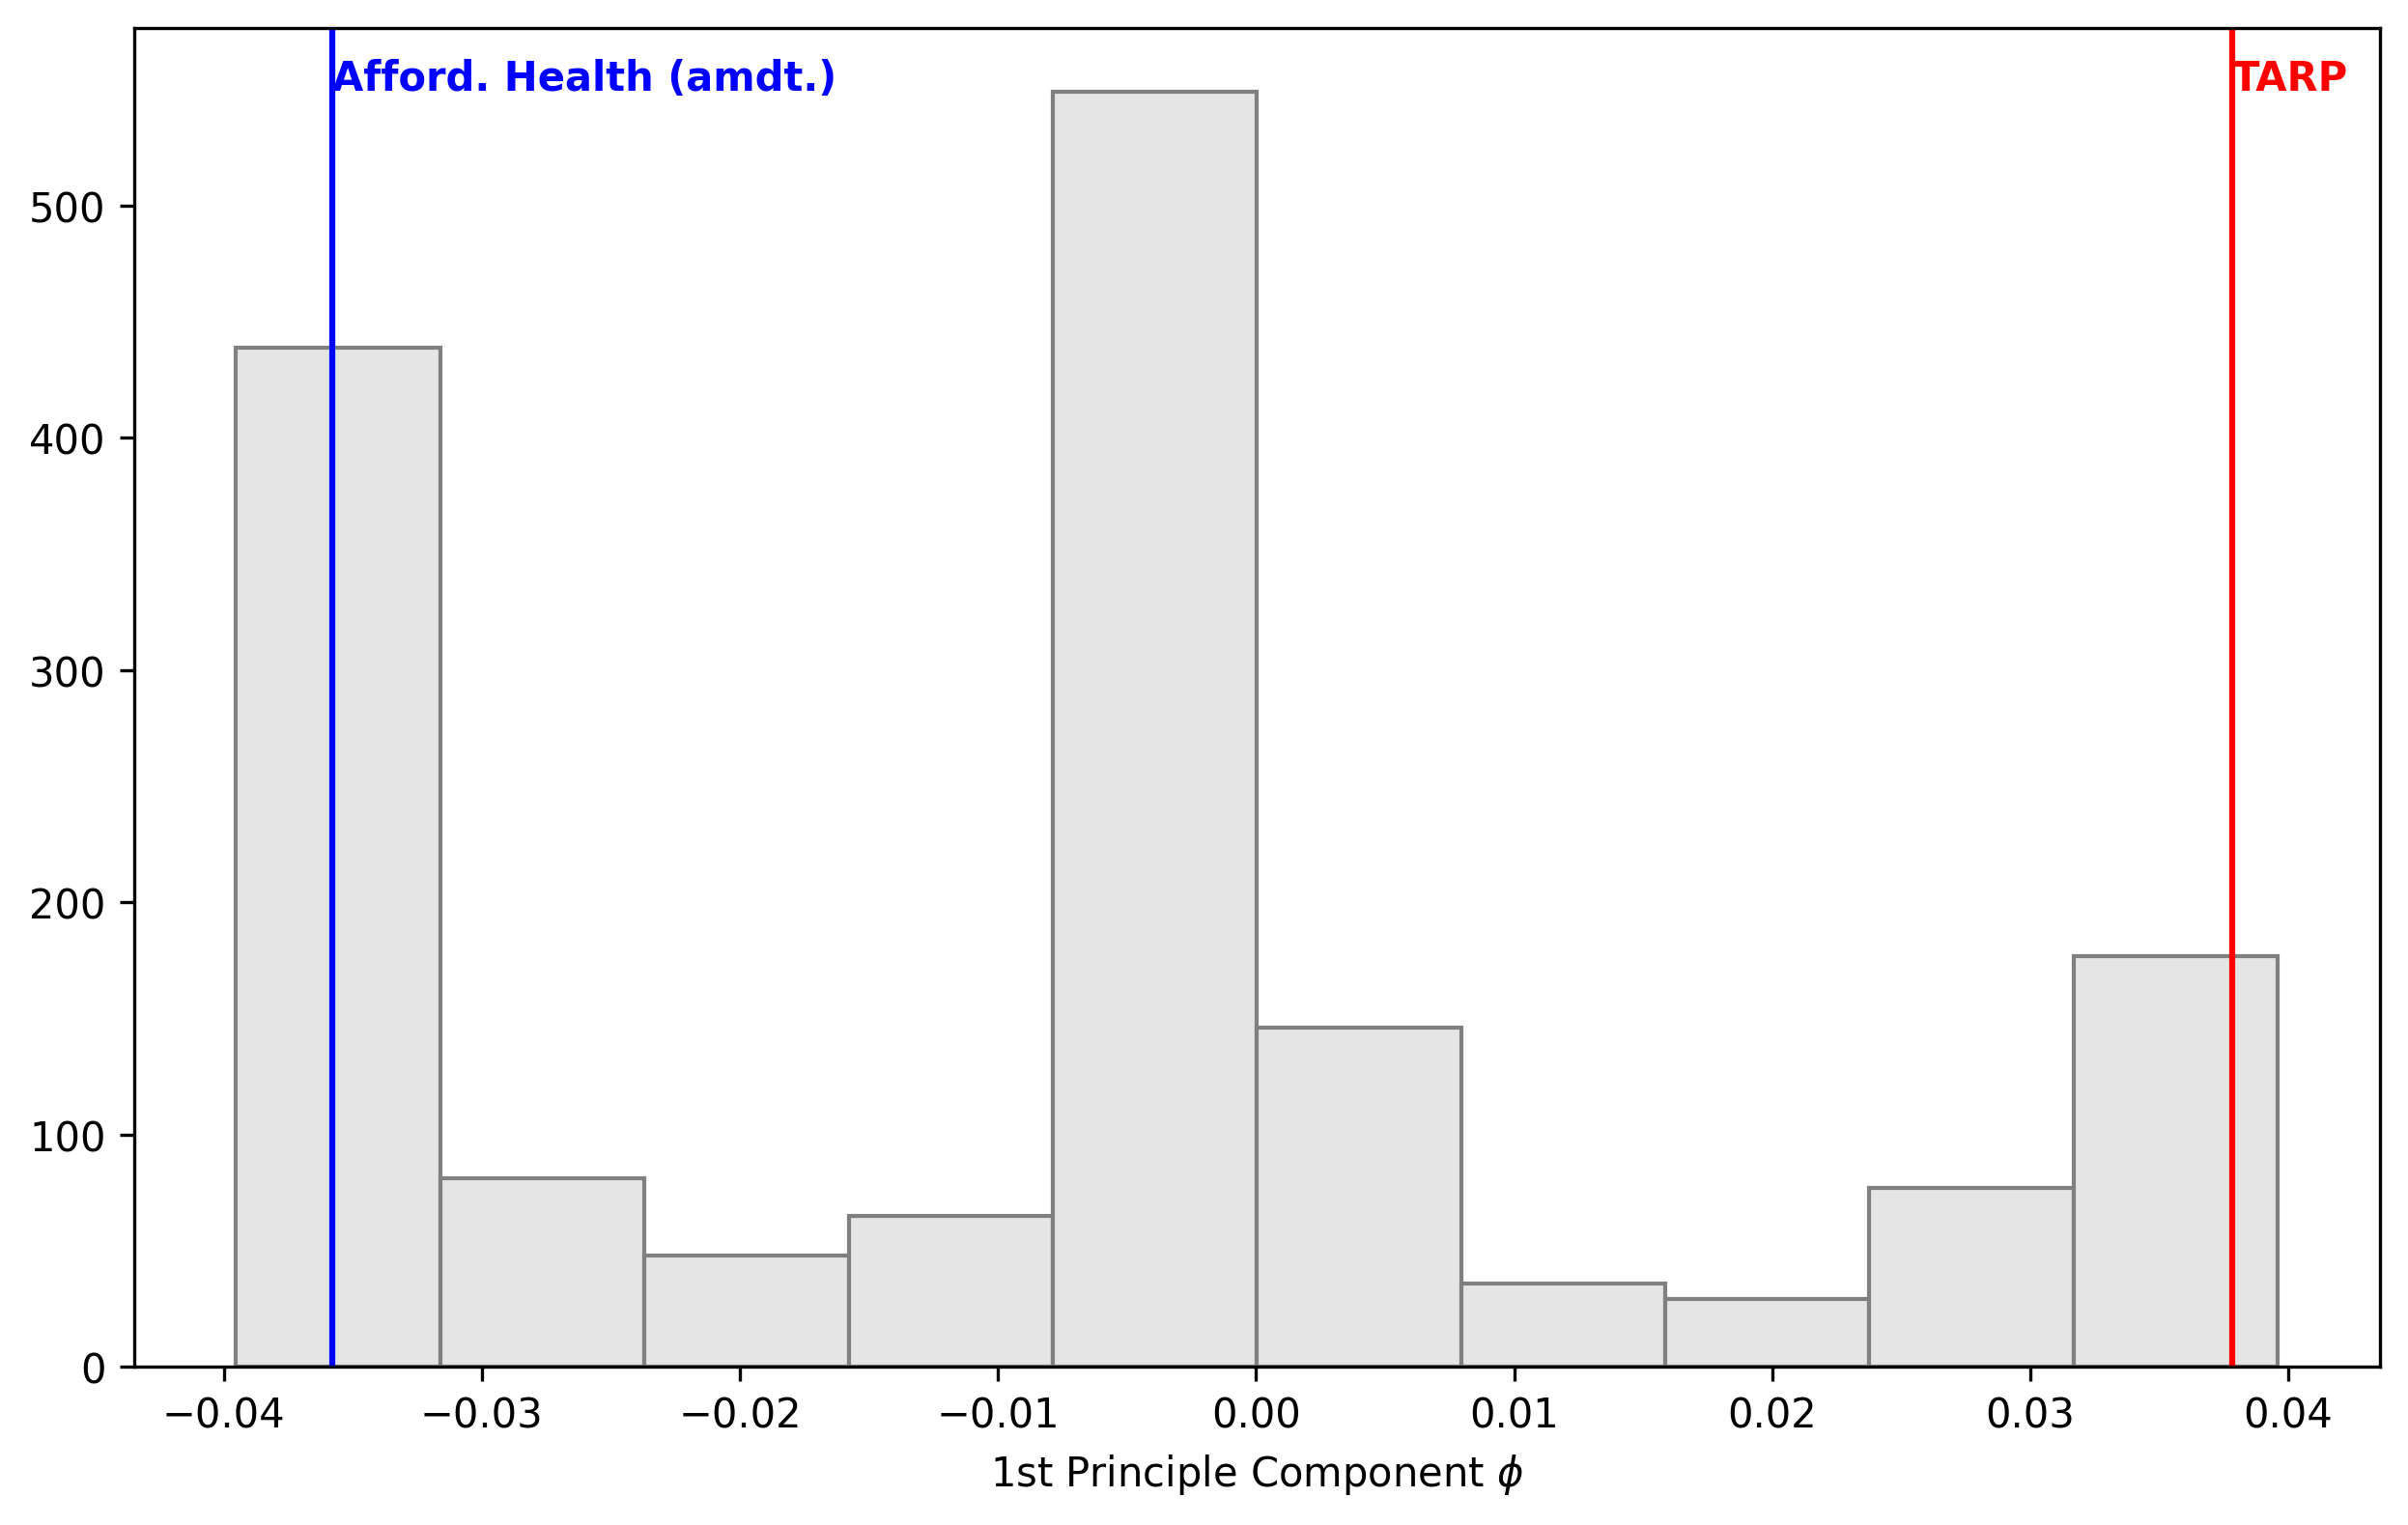

In [19]:
plt.figure(figsize=(10, 6), dpi=300)
plt.hist(votes_phi[0, :], color='#E5E5E5', edgecolor='grey')
plt.xlabel(r"1st Principle Component $\phi$")
plt.title("")

plt.axvline(x=votes_phi[0, 883], color='red')
plt.text(votes_phi[0, 883], 550, "TARP", color='red', fontweight='bold')

plt.axvline(x=votes_phi[0, 24], color='blue')
plt.text(votes_phi[0, 24], 550, "Afford. Health (amdt.)", color='blue', fontweight='bold')

# Show the plot
plt.show()


In [20]:
sorted_indices = np.argsort(np.abs(votes_phi[1, :]))[::-1]  # [::-1] for descending order

print(votes_phi[1, sorted_indices[:5]])

[0.05605862 0.05461947 0.05300806 0.05168382 0.05155729]


In [21]:
sorted_indices[:5]

array([1145,  657, 1089, 1103, 1148])

In [22]:
votes.iloc[:, sorted_indices[:5]]

,Vote 1146,Vote 658,Vote 1090,Vote 1104,Vote 1149
BONNER (R AL-1),1,1,1,1,1
BRIGHT (D AL-2),1,1,1,1,1
ROGERS (R AL-3),1,1,1,1,1
ADERHOLT (R AL-4),1,1,1,1,1
GRIFFITH (D/R AL-5),1,1,0,1,1
...,...,...,...,...,...
SENSENBR (R WI-5),1,1,1,1,1
PETRI (R WI-6),1,1,1,1,1
OBEY (D WI-7),1,1,1,1,1
KAGEN (D WI-8),1,1,1,1,1


In [23]:
df = votes.iloc[:, sorted_indices[:5]]
for col in df.columns:
    print(f"Counts for column '{col}':")
    print(df[col].value_counts())
    print("\n")

Counts for column 'Vote 1146':
Vote 1146
1    429
0     16
Name: count, dtype: int64


Counts for column 'Vote 658':
Vote 658
1    432
0     13
Name: count, dtype: int64


Counts for column 'Vote 1090':
Vote 1090
1    423
0     22
Name: count, dtype: int64


Counts for column 'Vote 1104':
Vote 1104
1    420
0     25
Name: count, dtype: int64


Counts for column 'Vote 1149':
Vote 1149
1    426
0     19
Name: count, dtype: int64




How could this be? Those stand out who did not show up. So this factor may be "attendance". We cannot learn much from these people because there is no "data" form them. Their few activities are recorded and comove with "attendance".

In [24]:
zero_counts = (votes == 0).sum(axis=1)
print(zero_counts.nlargest(5))

SOLIS (D CA-32)         1628
GILLIBRAND (D NY-20)    1619
REED (R NY-29)          1562
STUTZMAN (R IN-3)       1557
PELOSI (D CA-8)         1541
dtype: int64


In [29]:
print(votes_v.iloc[np.abs(votes_v.iloc[:, 1]).argsort().tail(5), 1])

REED (R NY-29)         -85.632634
STUTZMAN (R IN-3)      -85.688506
PELOSI (D CA-8)        -86.633251
GILLIBRAND (D NY-20)   -87.687297
SOLIS (D CA-32)        -88.412905
Name: 1, dtype: float64


In [30]:
# what are these people's feature values in the first PC?
print(votes_v.iloc[np.abs(votes_v.iloc[:, 1]).argsort().tail(5), 0])

REED (R NY-29)          12.003598
STUTZMAN (R IN-3)       12.592082
PELOSI (D CA-8)          8.115974
GILLIBRAND (D NY-20)    10.507639
SOLIS (D CA-32)         10.626533
Name: 0, dtype: float64


In [31]:
# the magnitude of the first featuer values
np.mean(np.abs(votes_v.iloc[:, 0]))

23.464192707845818

In [32]:
# the magnitude of the first featuer values
np.std(votes_v.iloc[:, 0])

24.476984795792724

# Principal Component Regressions

Instead of regressing $y$ on $x$, regress $y$ on $x$'s PCs.
In practice, try LASSO on both PCs and $x$.

## Algorithm 19 Principal Component (Lasso) Regression
1. Fit PCA on the full set of $x_i$ inputs to obtain $\nu_i$ of length $\min(n, p)$, where $n$ is the sample size and $p$ is the dimension of $x_i$.
1. Run Lasso regression for $y_i$ on $\nu_i$ for various subsets.
1. Or, regress $y$ on all $x$ and $\nu$ simultaneously via Lasso.

## TV Show Data

Survey on TV show pilots and the first year of rating results.
The question is "can we predict better viewer's interest?".

- gross rating points (GRP). Total viewership (unbounded).
- more, projected engagement (PE), between 0 and 100.

- 6241 views
- 20 questions
- 40 shows

In [33]:
shows = pd.read_csv("https://www.dropbox.com/s/28tqjgnmym6re1s/nbc_showdetails.csv?dl=1", index_col=0)
shows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Living with Ed to Grey's Anatomy
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Network   40 non-null     object 
 1   PE        40 non-null     float64
 2   GRP       40 non-null     float64
 3   Genre     40 non-null     object 
 4   Duration  40 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.9+ KB


In [34]:
shows

,Network,PE,GRP,Genre,Duration
Show,,,,,
Living with Ed,HGTV,54.0000,151.0,Reality,30
Monarch Cove,LIFE,64.6479,375.5,Drama/Adventure,60
Top Chef,BRAVO,78.5980,808.5,Reality,60
Iron Chef America,FOOD,62.5703,17.3,Reality,30
Trading Spaces: All Stars,TLC,56.0000,44.1,Reality,60
Lisa Williams: Life Among the Dead,LIFE,56.2056,382.6,Reality,60
Project Runway,BRAVO,83.4243,826.2,Reality,60
Next,MTV,30.0000,7.5,Reality,30
House Hunters,HGTV,60.5455,320.8,Reality,30


In [37]:
cmap = plt.colormaps.get_cmap('tab10')
num_genres = len(shows['Genre'].unique())
color_names = [cmap(i) for i in range(num_genres)]
colors_dict = {genre: color_names[i] for i, genre in enumerate(shows['Genre'].unique())}
colors = shows['Genre'].map(colors_dict)

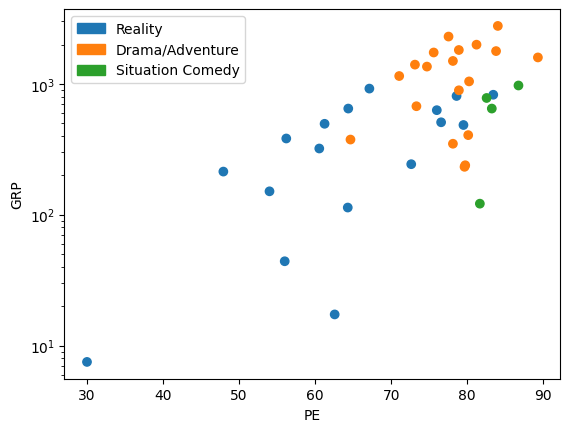

In [38]:
plt.figure()
scatter = plt.scatter(shows['PE'], shows['GRP'], c=colors, marker='o')
plt.yscale('log')  # set y-axis to log scale
plt.xlabel('PE')
plt.ylabel('GRP')

patches = [mpatches.Patch(color=v, label=k) for k, v in colors_dict.items()]
plt.legend(handles=patches)

plt.show()

We also have the pilot focus group survey results.

For each question, 1=strongly disagree, 5=strongly agree, or
1: 'The show makes me feel …', 2: 'I found the show …'

In [39]:
survey = pd.read_csv("https://www.dropbox.com/s/m2msz10s4braqjc/nbc_pilotsurvey.csv?dl=1")
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Viewer           6241 non-null   int64 
 1   Show             6241 non-null   object
 2   Q1_Attentive     6241 non-null   int64 
 3   Q1_Excited       6241 non-null   int64 
 4   Q1_Happy         6241 non-null   int64 
 5   Q1_Engaged       6241 non-null   int64 
 6   Q1_Curious       6241 non-null   int64 
 7   Q1_Motivated     6241 non-null   int64 
 8   Q1_Comforted     6241 non-null   int64 
 9   Q1_Annoyed       6241 non-null   int64 
 10  Q1_Indifferent   6241 non-null   int64 
 11  Q2_Relatable     6241 non-null   int64 
 12  Q2_Funny         6241 non-null   int64 
 13  Q2_Confusing     6241 non-null   int64 
 14  Q2_Predictable   6241 non-null   int64 
 15  Q2_Entertaining  6241 non-null   int64 
 16  Q2_Fantasy       6241 non-null   int64 
 17  Q2_Original      6241 non-null   

In [40]:
Xpilot = survey.groupby('Show').mean()
Xpilot.drop(columns = ['Viewer'], inplace=True)
Xpilot

,Q1_Attentive,Q1_Excited,Q1_Happy,Q1_Engaged,Q1_Curious,Q1_Motivated,Q1_Comforted,Q1_Annoyed,Q1_Indifferent,Q2_Relatable,Q2_Funny,Q2_Confusing,Q2_Predictable,Q2_Entertaining,Q2_Fantasy,Q2_Original,Q2_Believable,Q2_Boring,Q2_Dramatic,Q2_Suspenseful
Show,,,,,,,,,,,,,,,,,,,,
30 Rock,3.690265,3.469027,3.654867,3.743363,3.584071,2.964602,2.973451,2.115044,2.504425,3.053097,3.707965,2.150442,2.752212,4.150442,2.530973,3.982301,3.115044,1.991150,3.070796,2.849558
America's Next Top Model,3.844920,3.689840,3.582888,3.844920,3.711230,3.315508,2.951872,2.417112,2.465241,2.871658,3.491979,2.005348,2.844920,4.171123,2.588235,3.828877,3.524064,1.983957,3.754011,3.251337
American Chopper,3.672316,3.502825,3.463277,3.576271,3.706215,3.005650,2.864407,2.248588,2.429379,3.011299,3.531073,2.050847,2.762712,4.158192,2.435028,3.898305,3.638418,1.920904,3.457627,3.186441
Bones,4.120301,3.706767,3.421053,4.060150,4.150376,3.285714,2.947368,1.721805,2.112782,3.135338,3.390977,1.872180,2.511278,4.278195,2.609023,3.849624,3.578947,1.548872,3.984962,3.827068
CSI: Crime Scene Investigation,4.041451,3.699482,3.440415,3.984456,4.051813,3.347150,2.948187,2.088083,2.264249,3.119171,3.207254,2.305699,2.616580,4.259067,2.616580,4.031088,3.725389,1.766839,3.870466,3.839378
Close to Home,3.803738,3.317757,3.158879,3.831776,3.728972,3.177570,2.831776,1.925234,2.112150,3.168224,2.906542,1.869159,2.588785,4.084112,2.401869,3.841121,3.682243,1.719626,3.803738,3.514019
Cold Case,4.047904,3.532934,3.149701,3.910180,3.964072,3.059880,2.784431,1.886228,2.191617,3.131737,2.958084,1.946108,2.497006,4.227545,2.550898,4.023952,3.694611,1.664671,3.898204,3.652695
Cops,3.774566,3.456647,3.410405,3.780347,3.751445,3.034682,2.895954,2.173410,2.479769,3.052023,3.485549,2.028902,2.809249,4.225434,2.248555,3.797688,3.913295,1.843931,3.624277,3.416185
Dancing with the Stars,3.933702,3.696133,3.651934,3.889503,3.845304,3.425414,3.088398,2.071823,2.298343,3.033149,3.453039,1.911602,2.558011,4.237569,2.618785,4.049724,3.607735,1.795580,3.397790,3.419890


In [41]:
# sanity check
set(shows.index) == set(Xpilot.index)

True

In [42]:
Xpilot = Xpilot.reindex(shows.index)

## PCA

In [43]:
scaler = StandardScaler()
Xpilot_scaled = scaler.fit_transform(Xpilot)

In [44]:
pca = PCA()
Xpilot_v = pca.fit_transform(Xpilot_scaled)

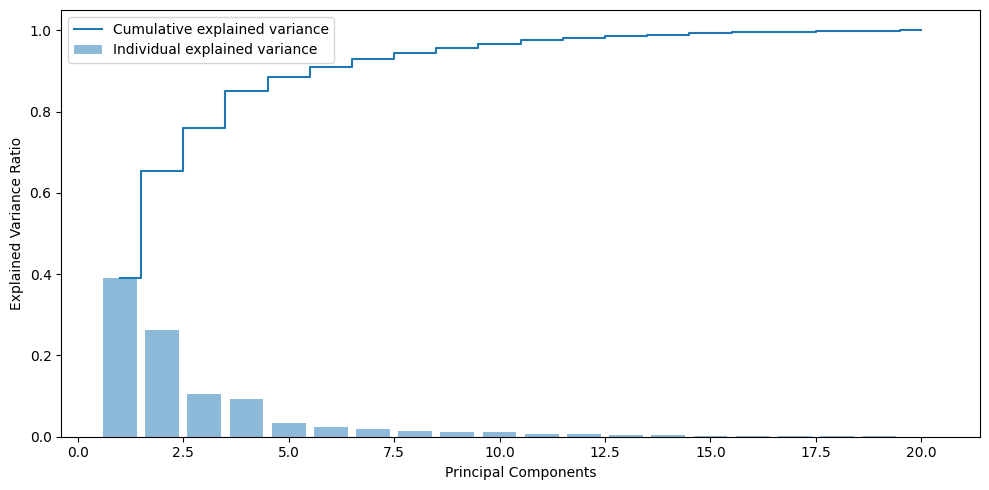

In [45]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.bar(range(1,len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(explained_variance)+1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## bottom-up

In [46]:
Xpilot_phi = pca.components_[0:3, :]
Xpilot_phi = pd.DataFrame(Xpilot_phi)
Xpilot_phi.columns = Xpilot.columns
Xpilot_phi.T

,0,1,2
Q1_Attentive,0.343650,0.004541,0.007459
Q1_Excited,0.312611,0.132510,0.094256
Q1_Happy,0.130375,0.235286,0.482103
Q1_Engaged,0.339703,-0.027238,0.045127
Q1_Curious,0.293097,-0.003927,-0.133443
Q1_Motivated,0.238482,0.251293,-0.029095
Q1_Comforted,0.144996,0.364815,0.068561
Q1_Annoyed,-0.199689,0.265355,-0.128916
Q1_Indifferent,-0.169066,0.354176,-0.127071
Q2_Relatable,0.091980,0.310290,0.056600


## Top-down

In [47]:
Xpilot_v.shape

(40, 20)

In [48]:
cmap = plt.colormaps.get_cmap('tab10')
num_genres = len(shows['Genre'].unique())
color_names = [cmap(i) for i in range(num_genres)]
colors_dict = {genre: color_names[i] for i, genre in enumerate(shows['Genre'].unique())}
colors = shows['Genre'].map(colors_dict)

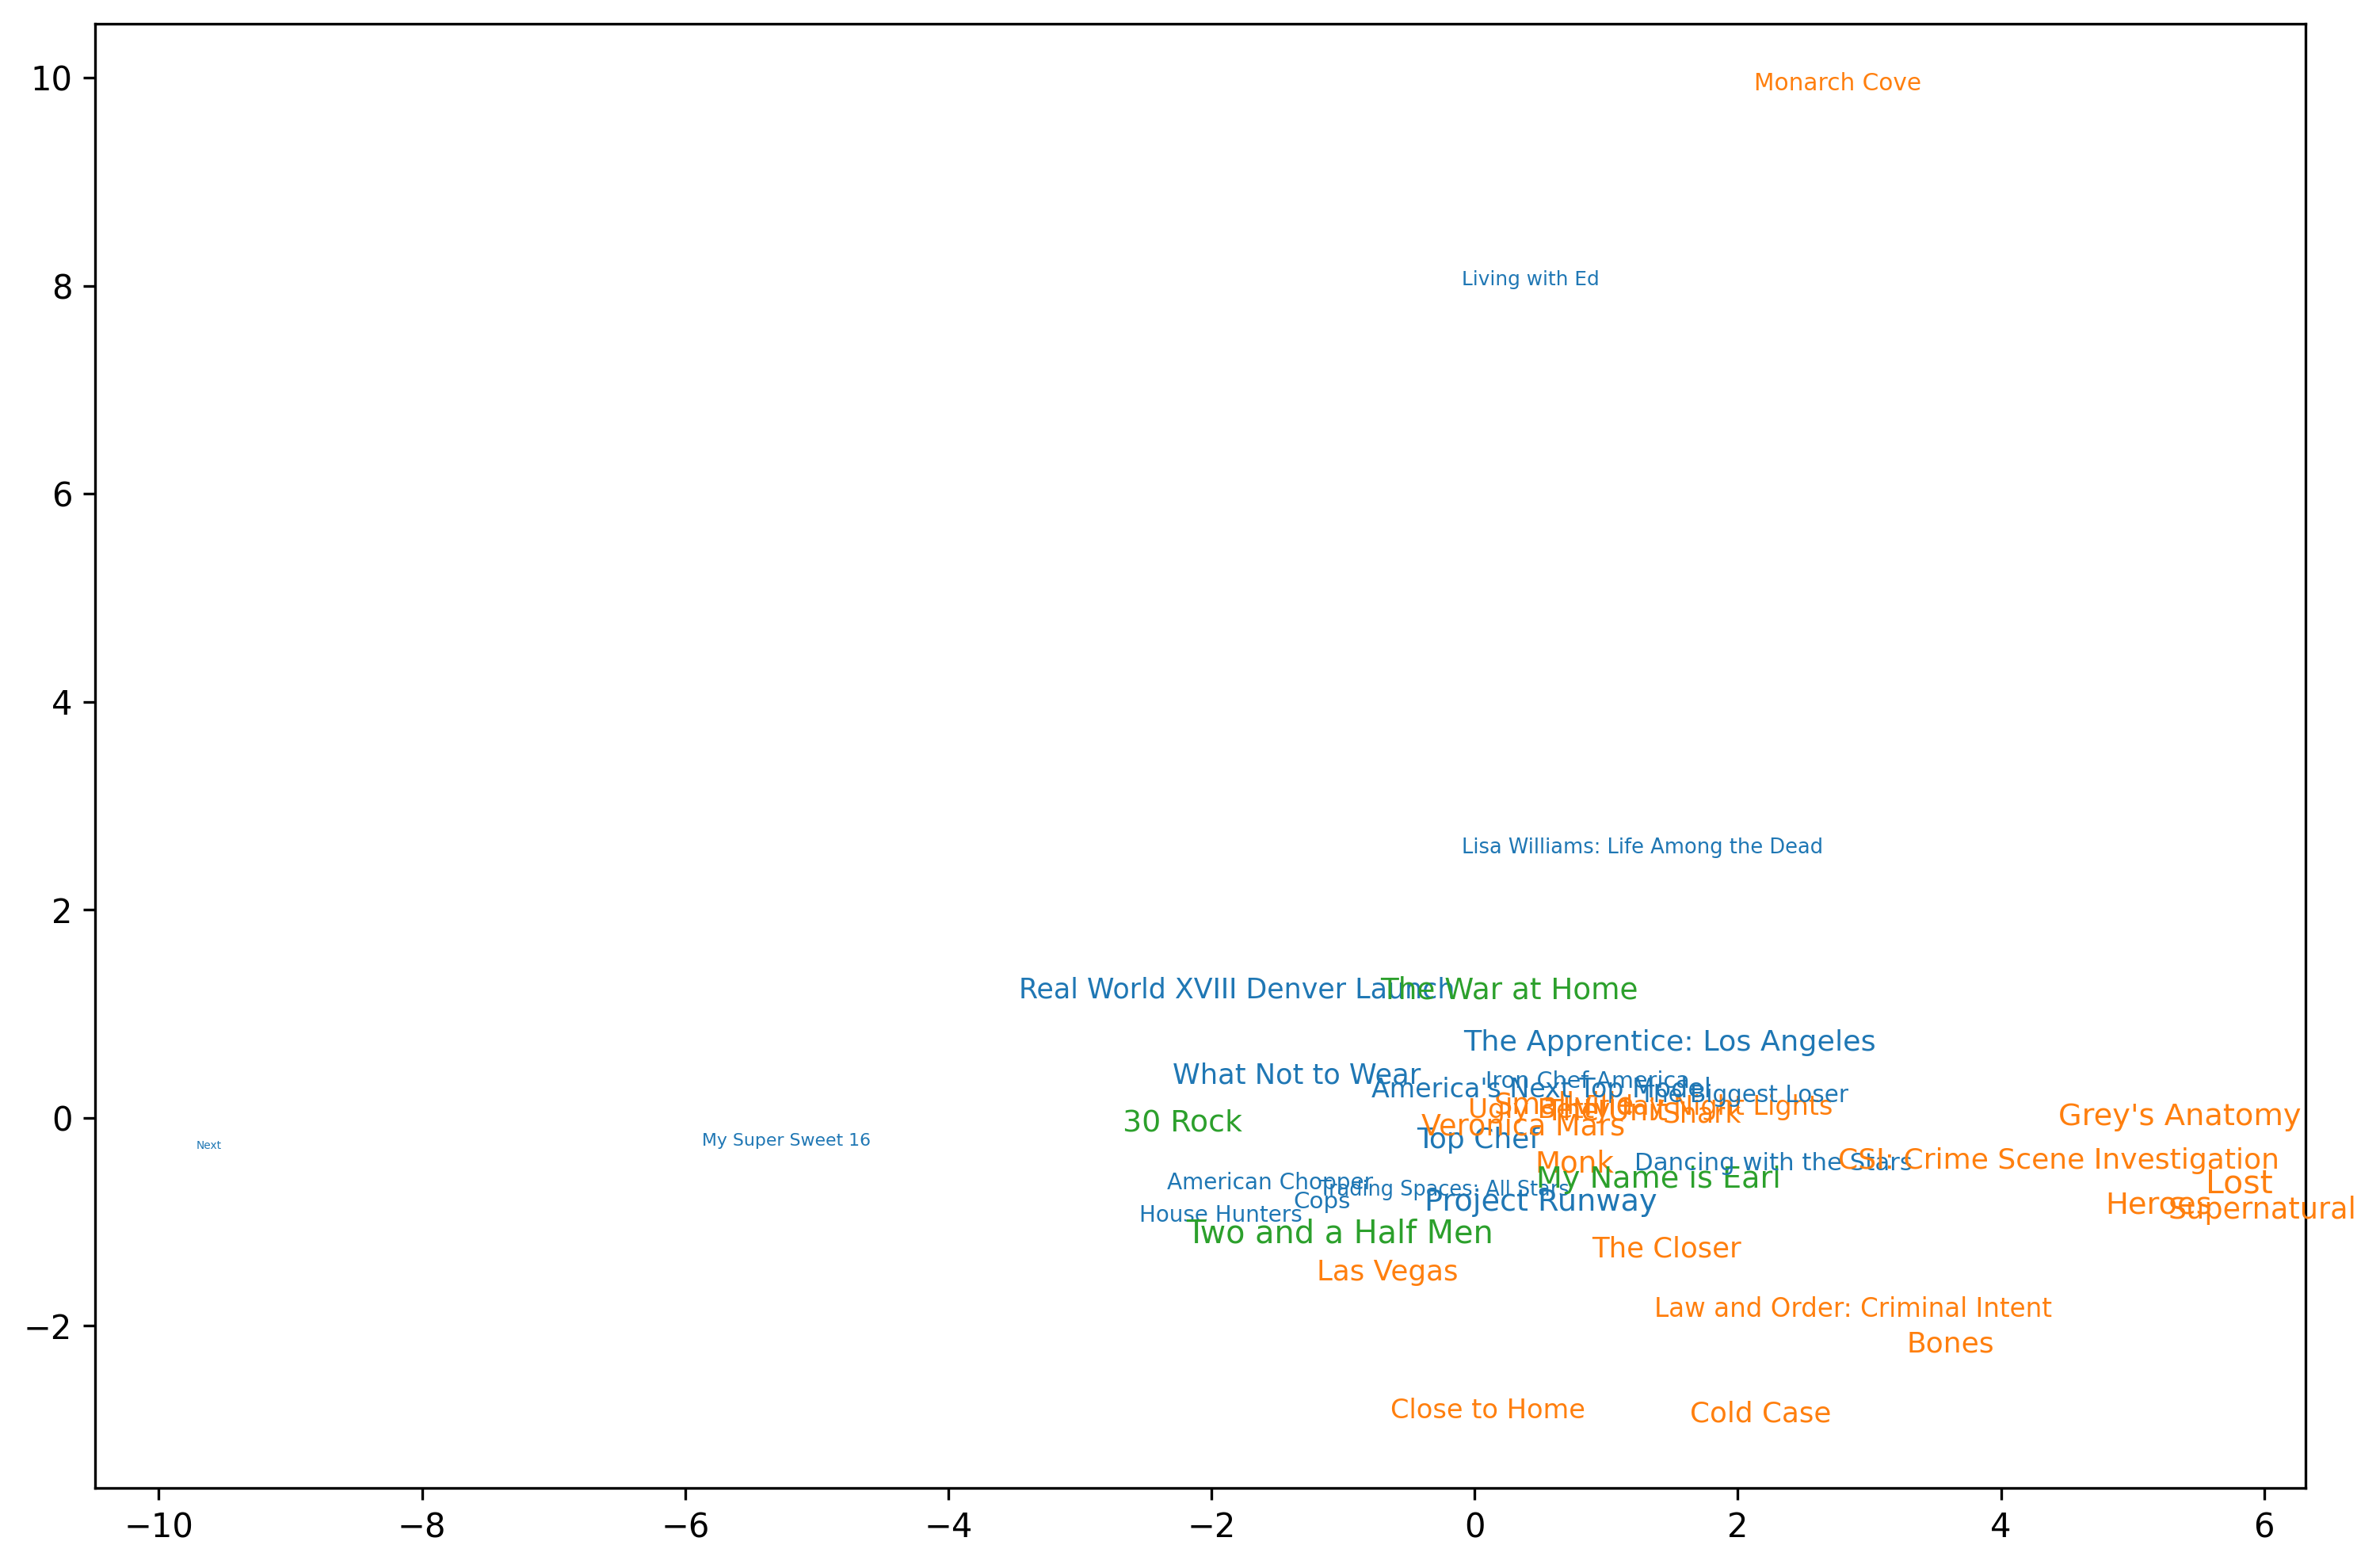

In [50]:
plt.figure(figsize=(12, 8), dpi=300)

# Create an empty scatter plot
plt.scatter(Xpilot_v[:, 0], Xpilot_v[:, 1], color='none')

text_sizes = shows['PE'] / shows['PE'].mean()
for x, y, label, color, size in zip(Xpilot_v[:, 0], Xpilot_v[:, 1], Xpilot.index, colors, text_sizes):
     plt.text(x, y, label, color=color, fontsize= 8* size)

plt.show()

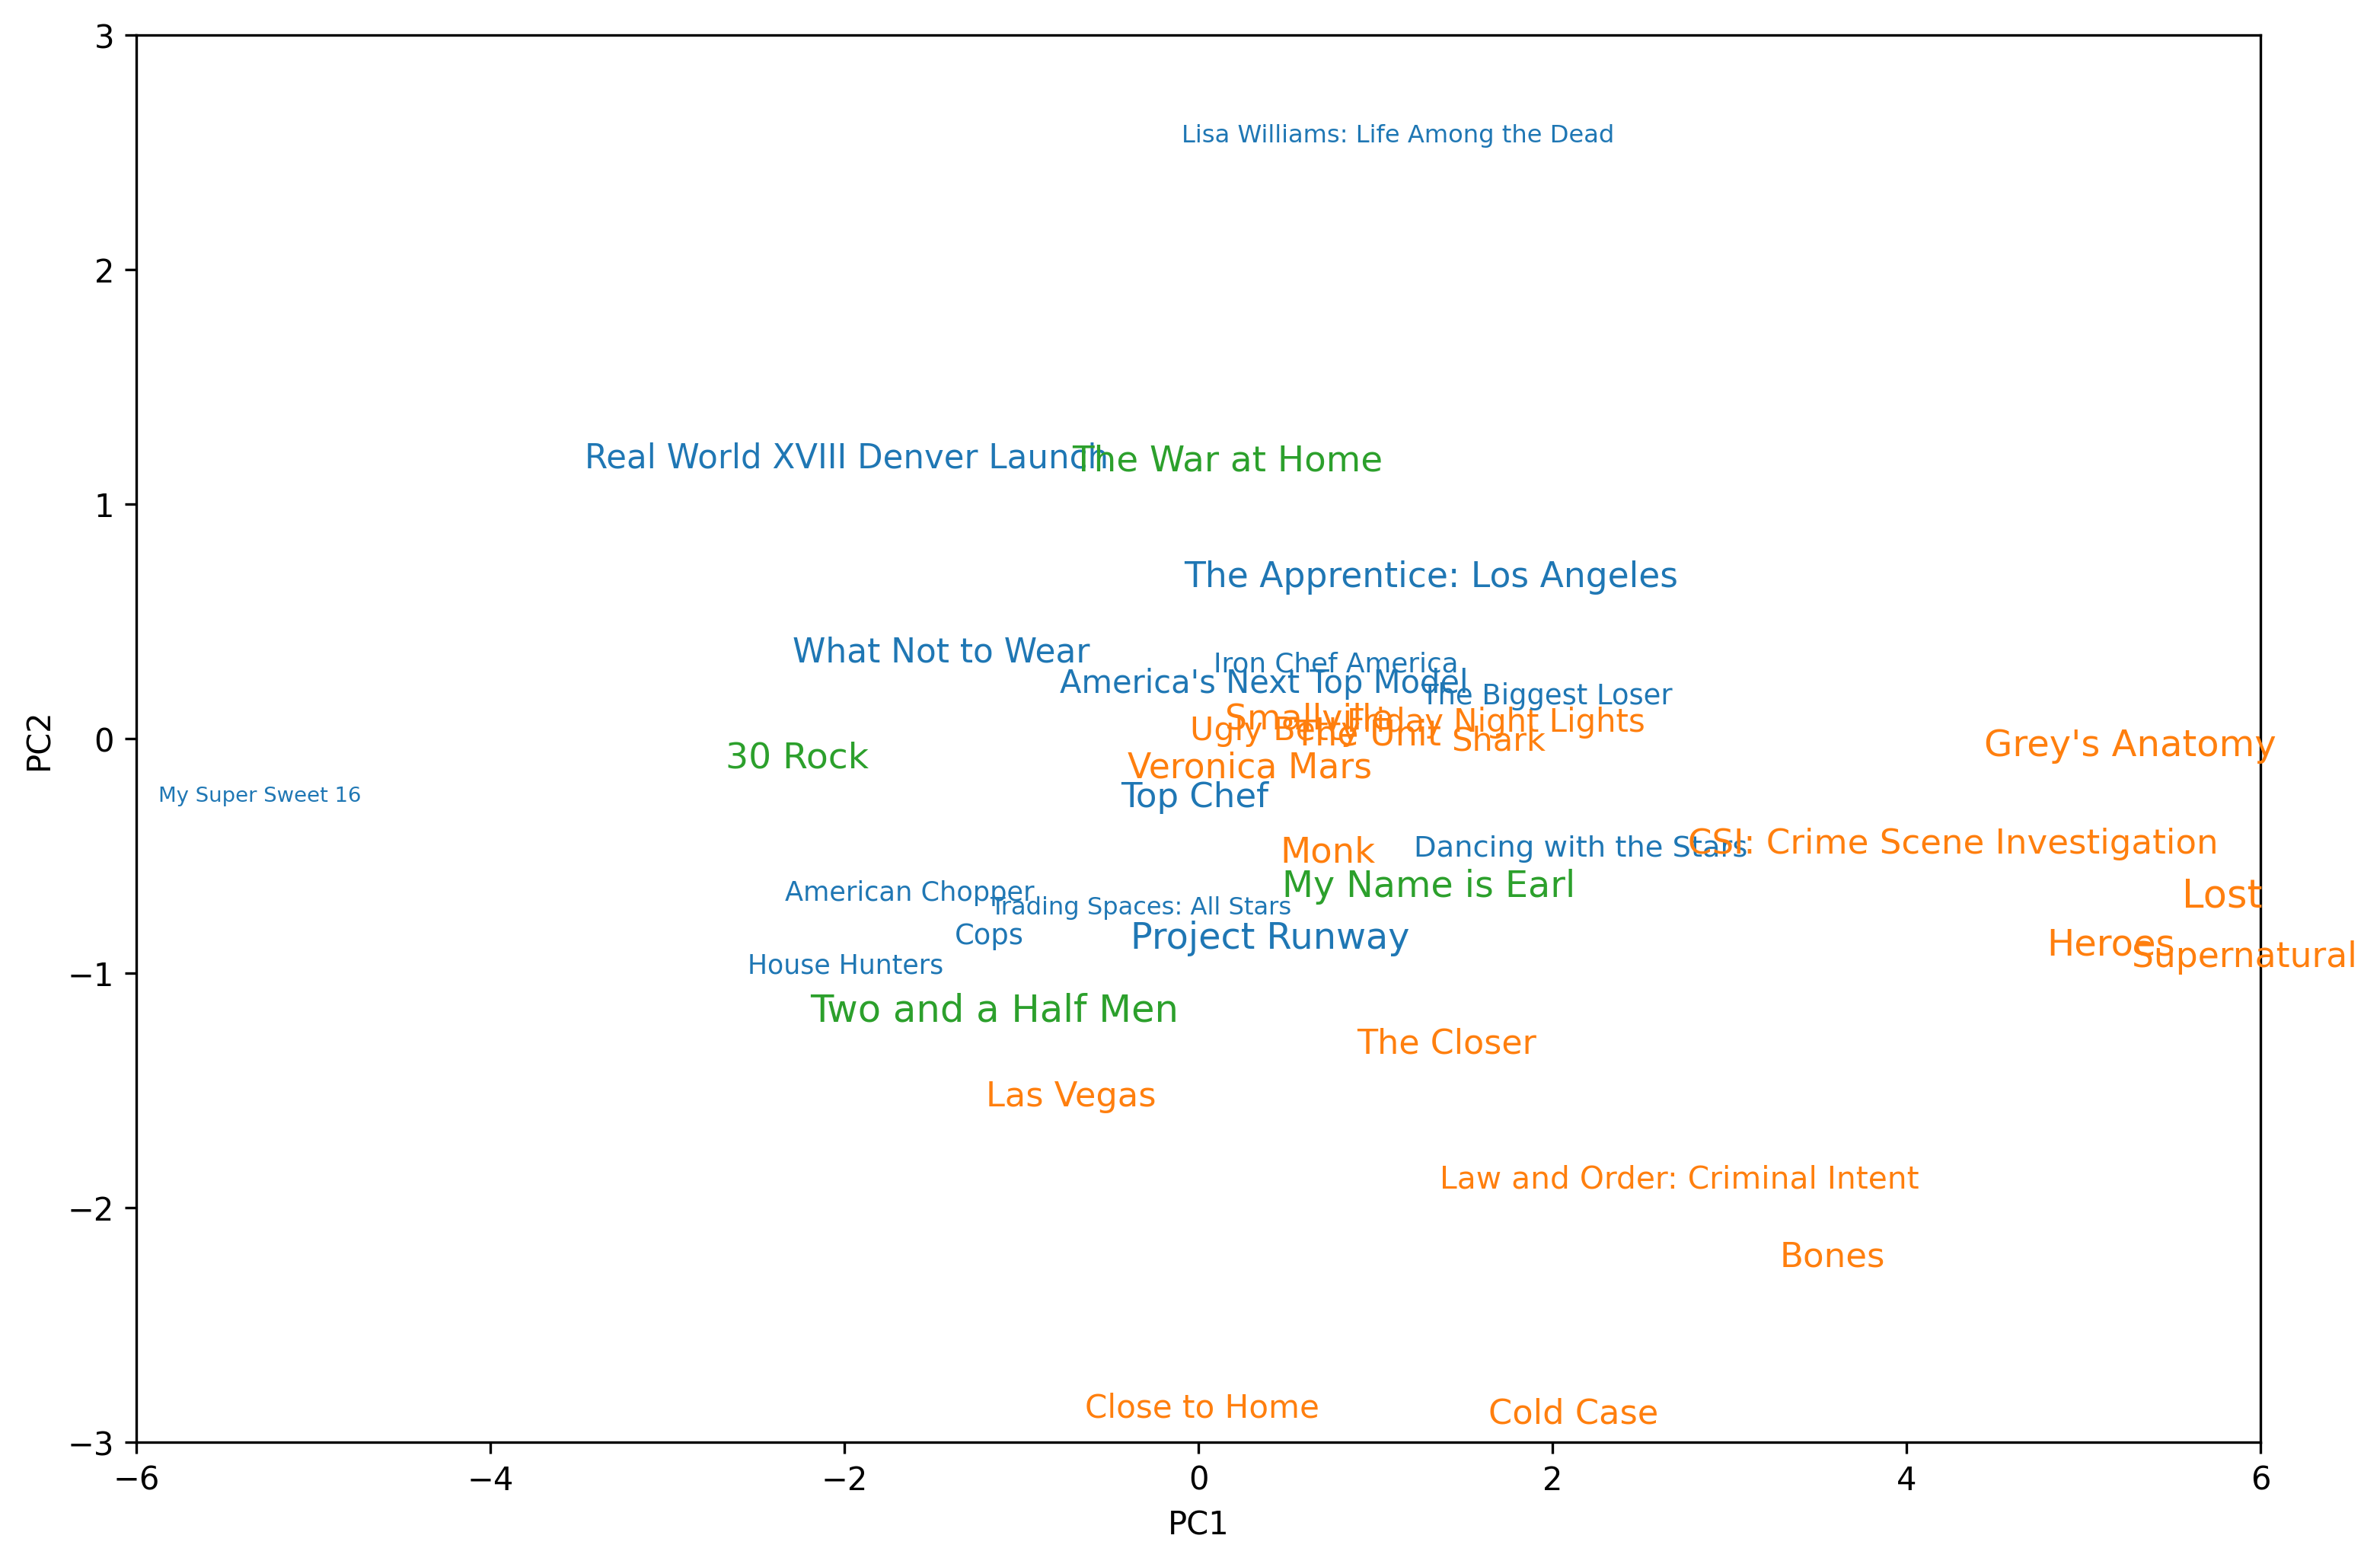

In [51]:
plt.figure(figsize=(12, 8), dpi=300)

# Create an empty scatter plot
x_limits = (-6, 6)
y_limits = (-3, 3)
plt.ylim(y_limits)
plt.xlim(x_limits)

x = Xpilot_v[:, 0]
y = Xpilot_v[:, 1]
ind = np.where((x >= x_limits[0]) & (x <= x_limits[1]) & (y >= y_limits[0]) & (y <= y_limits[1]))
plt.scatter(x[ind], y[ind], color='none')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add text
text_sizes = shows['PE'] / shows['PE'].mean()
for x, y, label, color, size in zip(x[ind], y[ind], Xpilot.index[ind], colors.iloc[ind], text_sizes.iloc[ind]):
     plt.text(x, y, label, color=color, fontsize= 10* size)

plt.show()

## PC regression

In [52]:
PE = shows['PE']
Xpilot_v = pd.DataFrame(Xpilot_v)
Xpilot_v.index = Xpilot.index
k = Xpilot.shape[1]  # Number of columns
Xpilot_v.columns = ['PC' + str(i+1) for i in range(k)]

Xpilot_v

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Show,,,,,,,,,,,,,,,,,,,,
Living with Ed,-0.099053,8.002324,0.402415,0.075383,-0.051393,-0.165447,0.226592,0.308991,0.520310,0.653121,0.342095,0.784590,-0.292047,-0.297227,-0.369679,-0.291642,0.121092,-0.175310,-0.062707,-0.023704
Monarch Cove,2.126068,9.879559,-1.137835,0.355362,0.441561,0.596545,-0.234929,-0.134573,0.412437,-0.465350,-0.596671,-0.439027,0.157249,0.113215,0.254751,0.221524,0.077441,0.205089,0.034263,0.030965
Top Chef,-0.439177,-0.290549,1.160985,0.415404,0.713283,-0.545852,0.583015,-0.458687,0.154045,0.067329,-0.419810,-0.313693,0.063157,0.457185,-0.219896,-0.043308,-0.116830,0.038934,0.145382,-0.256183
Iron Chef America,0.085141,0.286824,0.548919,0.701682,0.849994,-0.687683,1.057193,0.002180,-0.063544,0.230670,0.254168,-0.007019,0.027135,-0.223416,0.004997,0.036549,-0.086880,0.249528,-0.265686,-0.069009
Trading Spaces: All Stars,-1.180374,-0.747093,0.660150,1.786215,0.690365,0.365147,0.929786,0.182721,-0.003874,-0.178153,0.587378,-0.091775,-0.399134,0.116146,-0.127379,0.276871,-0.072731,-0.286359,-0.238575,0.075219
Lisa Williams: Life Among the Dead,-0.096914,2.543639,-1.240376,1.216863,-1.814893,-0.188255,-0.045537,-0.546323,-0.726449,-0.180615,0.658362,-1.095990,-0.166852,0.142129,0.169213,-0.181004,-0.108042,-0.082007,-0.044611,-0.001869
Project Runway,-0.382437,-0.894294,0.892438,-0.200655,0.945101,-0.109009,-0.012398,0.078644,-0.351296,-0.251628,-0.221304,0.217599,-0.290217,-0.022211,-0.133294,0.273706,-0.030388,0.187086,0.038965,-0.056399
Next,-9.718447,-0.302354,-1.185642,-2.934206,-0.099159,-0.694094,1.217725,0.465823,0.805151,-0.304340,-0.081922,-0.072294,0.571139,0.125989,0.251550,-0.197253,0.331516,-0.093708,0.061352,0.054203
House Hunters,-2.546474,-1.001003,-0.050862,2.245424,-0.524785,0.926640,1.089291,1.043917,0.328330,0.200733,-0.520808,-0.161278,-0.562516,-0.367622,0.050439,-0.307842,-0.057957,0.348747,-0.055940,-0.011356


In [53]:
# Define the model
model = smf.ols(formula='PE ~ PC1+PC2', data=Xpilot_v)

# Fit the model
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     15.68
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           1.17e-05
Time:                        09:49:26   Log-Likelihood:                -143.48
No. Observations:                  40   AIC:                             293.0
Df Residuals:                      37   BIC:                             298.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.6831      1.437     50.580      0.0

In [54]:
k = len(results.params)  # Number of parameters (including intercept)
n = len(PE)  # Sample size
results.aic + (2 * k * (k + 1)) / (n - k - 1)

293.6219717585754

In [55]:
aicc = []
for ii in range(20):
  xlist = '+'.join(['PC' + str(i+1) for i in range(ii+1)])
  fml = 'PE~'+xlist
  model = smf.ols(formula=fml, data=Xpilot_v)
  results = model.fit()
  k = len(results.params)  # Number of parameters (including intercept)
  n = len(PE)  # Sample size
  aicc.append(results.aic + (2 * k * (k + 1)) / (n - k - 1))

In [56]:
np.argmin(aicc)

6

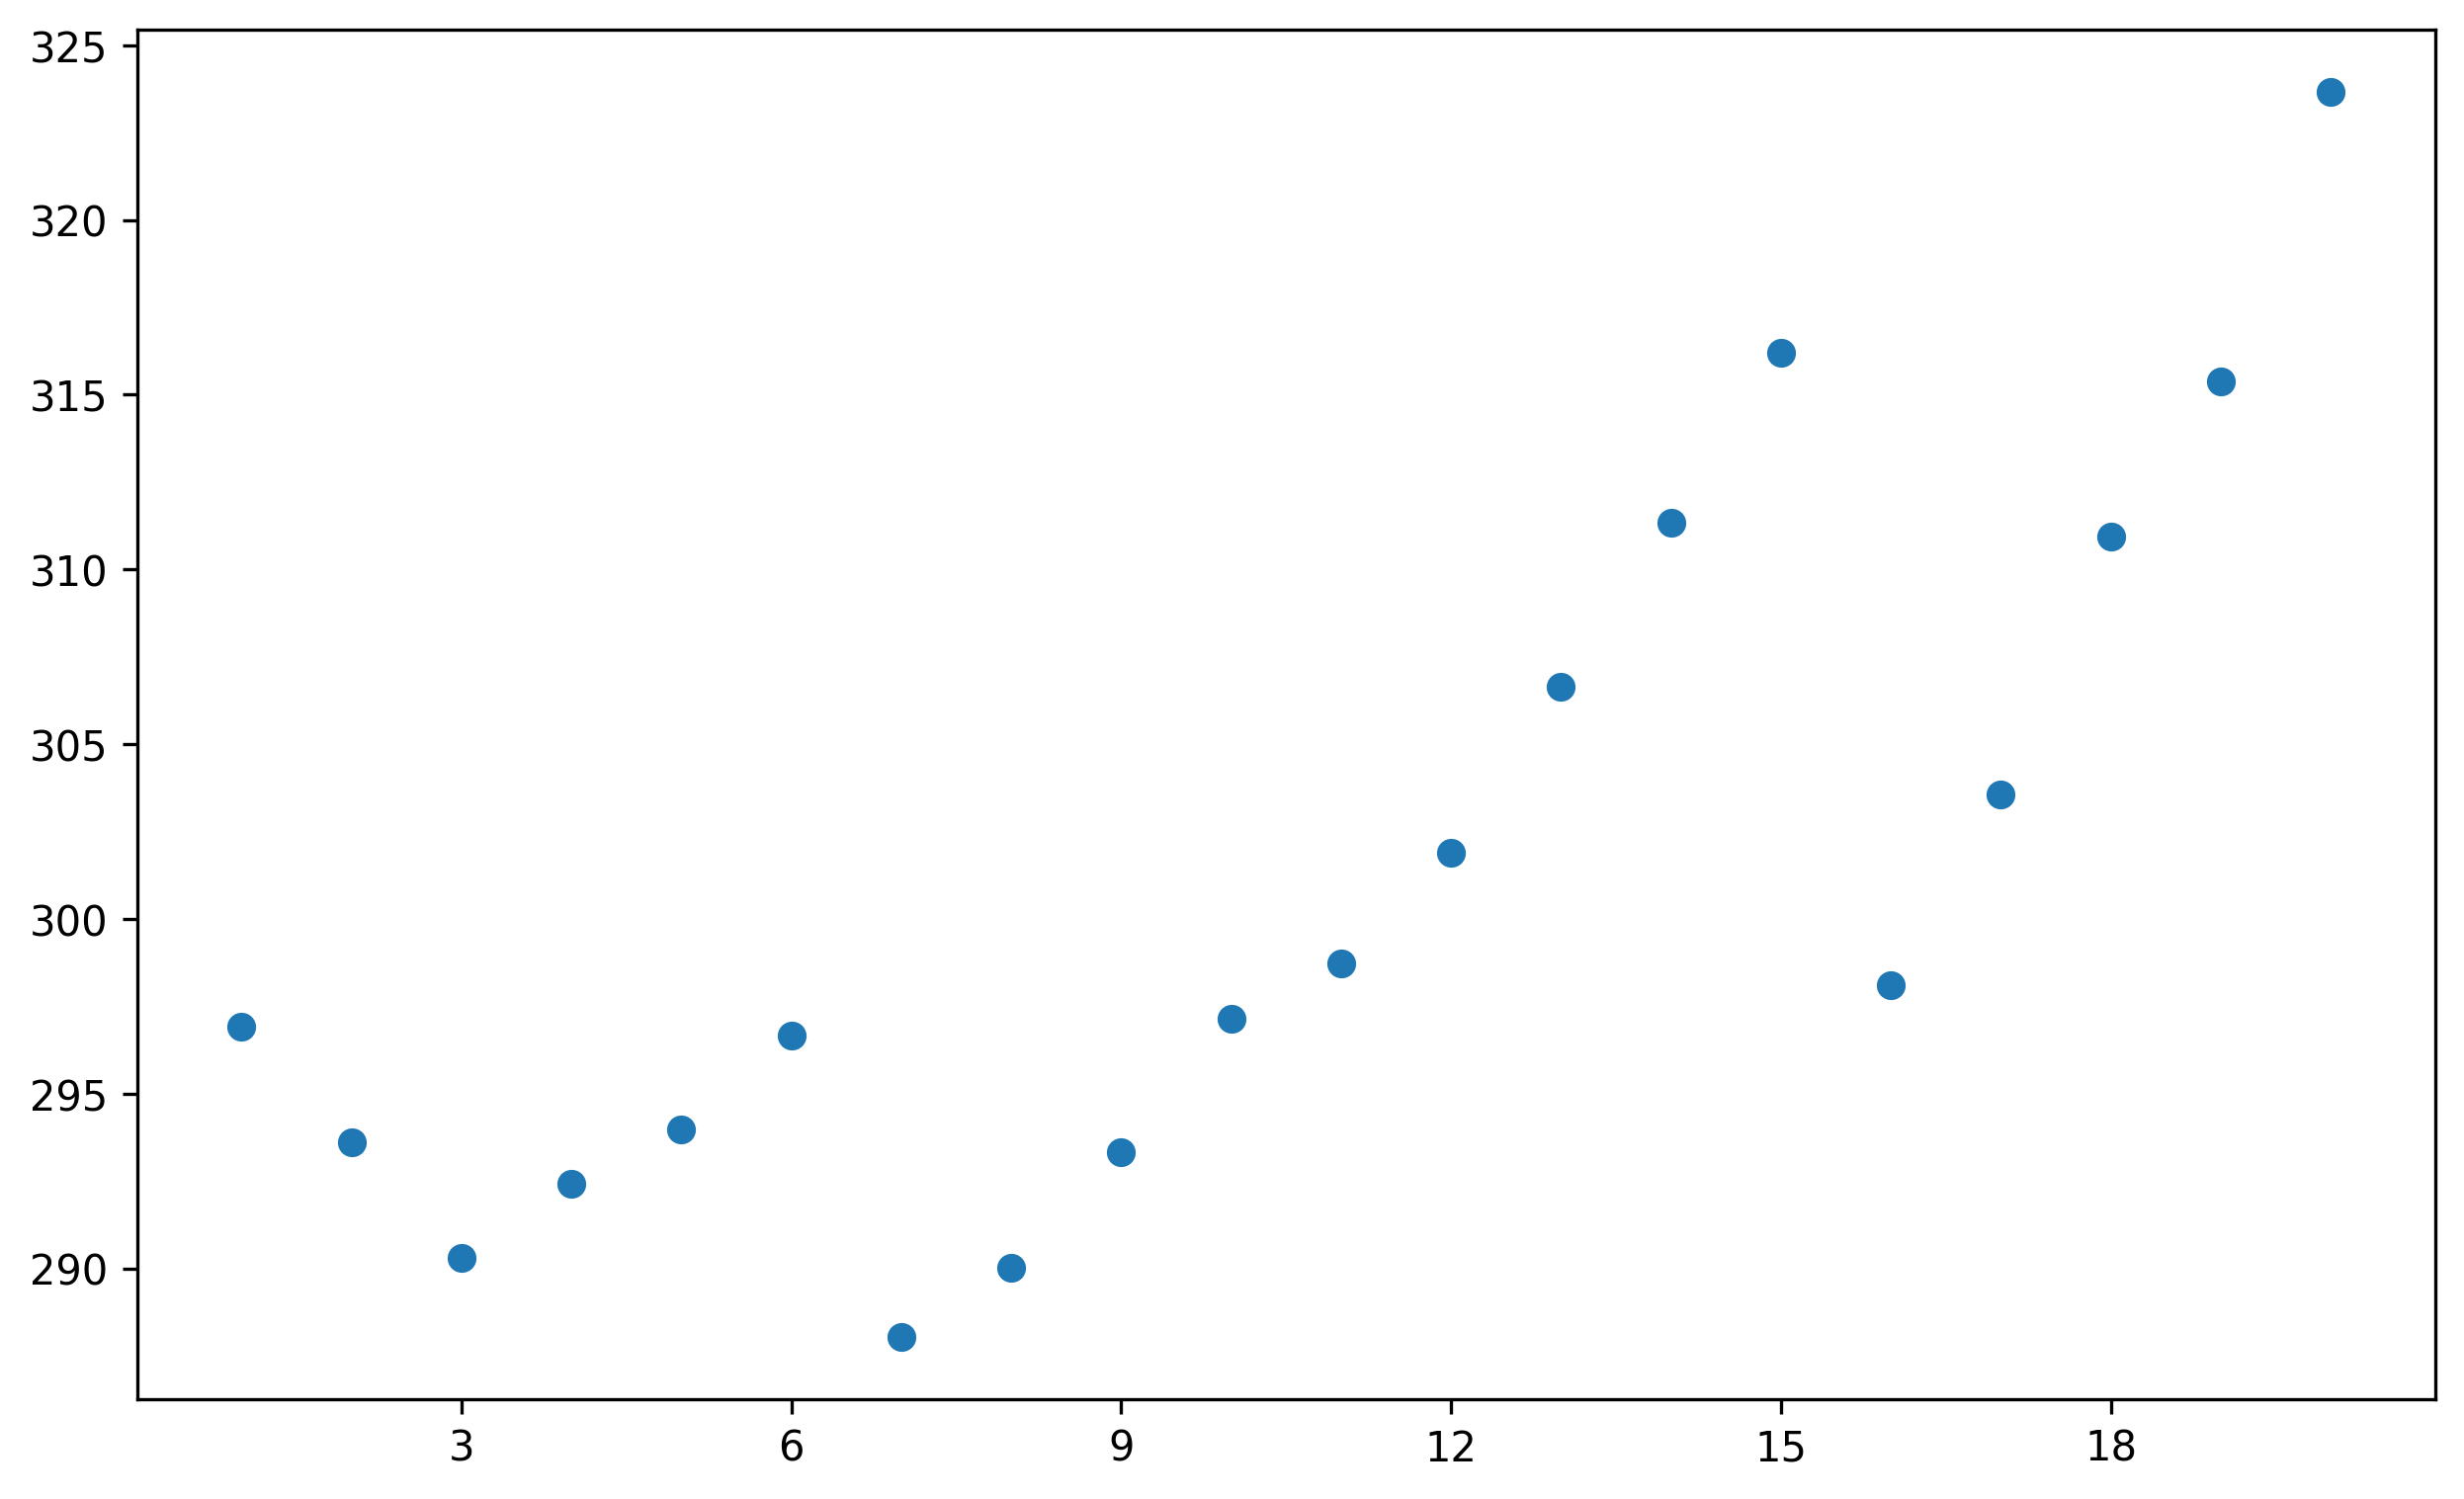

In [57]:
plt.figure(figsize=(10,6), dpi=300)
x = range(1,len(aicc)+1)
y = aicc
plt.scatter(x, y)
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

In [58]:
xlist = '+'.join(Xpilot_v.columns.values)
fml = 'PE~-1+'+xlist
Y, X = patsy.dmatrices(fml, data=Xpilot_v)

In [59]:
X.shape

(40, 20)

In [62]:
Y.shape

(40, 1)

In [63]:
Y = Y.ravel()

In [64]:
lasso_cv = LassoCV(alphas=None, cv=20)
lasso_cv.fit(X, Y)

# Print the optimal alpha value
print("Best alpha using built-in LassoCV: %f" % lasso_cv.alpha_)

# Print coefficients
print("LassoCV Coefficients:", lasso_cv.coef_)

Best alpha using built-in LassoCV: 0.289204
LassoCV Coefficients: [ 2.56991781 -1.42895802  2.08328592 -0.50867537 -1.27722579 -0.31799897
 -5.76911802  1.33932108 -0.         -0.         -2.35504015  0.96368943
 -0.          0.         -0.         13.37766222 -0.          0.
  0.         -0.        ]


In [65]:
df0 = pd.DataFrame(lasso_cv.coef_, index=Xpilot_v.columns, columns=['coef'])

In [66]:
df0.loc[df0['coef']!=0]

,coef
PC1,2.569918
PC2,-1.428958
PC3,2.083286
PC4,-0.508675
PC5,-1.277226
PC6,-0.317999
PC7,-5.769118
PC8,1.339321
PC11,-2.355040
PC12,0.963689


## PC and X

In [67]:
Xpilot_scaled_df = pd.DataFrame(Xpilot_scaled, index=Xpilot.index, columns=Xpilot.columns)
Xpilot_scaled_df

,Q1_Attentive,Q1_Excited,Q1_Happy,Q1_Engaged,Q1_Curious,Q1_Motivated,Q1_Comforted,Q1_Annoyed,Q1_Indifferent,Q2_Relatable,Q2_Funny,Q2_Confusing,Q2_Predictable,Q2_Entertaining,Q2_Fantasy,Q2_Original,Q2_Believable,Q2_Boring,Q2_Dramatic,Q2_Suspenseful
Show,,,,,,,,,,,,,,,,,,,,
Living with Ed,0.122099,1.046455,2.127513,0.159268,-0.120520,1.606470,2.534581,1.554939,2.945849,2.446783,1.844165,2.463432,2.595755,-0.533283,2.121963,0.046325,1.422027,3.346898,-0.461860,0.262898
Monarch Cove,1.024712,1.506833,1.615025,0.221239,1.082477,2.998482,4.046949,2.741045,3.076383,3.604156,1.282302,3.492606,2.843339,-0.761011,2.075125,1.536963,1.417450,3.036784,1.296709,0.857317
Top Chef,-0.135522,-0.002909,0.559796,-0.370208,0.197026,-0.142292,-0.056717,0.174845,-0.013189,0.257679,0.431031,-1.097448,0.285893,0.876149,-0.541876,-0.382956,0.079435,-0.260188,-0.132688,-0.650511
Iron Chef America,0.236779,0.550205,0.457245,0.080881,0.691025,0.435867,0.158568,-0.072909,0.151406,-0.116945,0.314614,-0.570324,0.400021,0.270464,-0.468320,-0.806488,0.648546,0.129390,-0.291831,-0.395820
Trading Spaces: All Stars,-0.357010,-0.318938,-0.078331,-0.317180,0.521989,0.269795,-0.951244,-0.121735,0.104971,0.309463,0.083889,-0.943102,-0.120690,-0.399108,-1.110672,-0.421419,1.026377,-0.142583,-1.167940,-1.122195
Lisa Williams: Life Among the Dead,-0.885404,0.297592,0.138727,-0.981069,-0.417206,1.427809,1.653927,0.211844,0.732264,1.370455,-0.322671,0.759669,-0.052574,-1.688078,1.073606,-0.179601,1.093669,0.084136,0.392845,0.340250
Project Runway,0.277422,-0.144986,0.540001,0.227541,-0.000221,-0.417985,-0.718325,0.170736,-0.188512,-0.566647,0.321650,-0.549916,0.051537,0.243580,-0.757159,0.000729,-0.303665,-0.284763,-0.035660,-0.679473
Next,-3.355955,-2.452583,-2.045014,-3.546319,-1.837957,-3.037436,-1.692600,2.386710,1.423588,-1.699696,0.989589,-0.568948,2.535927,-2.311060,-0.083273,-3.808334,-2.924176,2.222415,-1.700085,-1.996588
House Hunters,-0.689819,-1.221266,-0.649820,-0.664270,-0.150595,-0.578728,-0.282766,-0.188895,-0.341362,0.533441,-1.471882,-0.772151,0.490900,-1.042442,-1.125506,-0.784851,0.926759,0.258736,-2.120846,-1.400649


In [68]:
Xpilot_join = Xpilot_scaled_df.join(Xpilot_v)
Xpilot_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Living with Ed to Grey's Anatomy
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Q1_Attentive     40 non-null     float64
 1   Q1_Excited       40 non-null     float64
 2   Q1_Happy         40 non-null     float64
 3   Q1_Engaged       40 non-null     float64
 4   Q1_Curious       40 non-null     float64
 5   Q1_Motivated     40 non-null     float64
 6   Q1_Comforted     40 non-null     float64
 7   Q1_Annoyed       40 non-null     float64
 8   Q1_Indifferent   40 non-null     float64
 9   Q2_Relatable     40 non-null     float64
 10  Q2_Funny         40 non-null     float64
 11  Q2_Confusing     40 non-null     float64
 12  Q2_Predictable   40 non-null     float64
 13  Q2_Entertaining  40 non-null     float64
 14  Q2_Fantasy       40 non-null     float64
 15  Q2_Original      40 non-null     float64
 16  Q2_Believable    40 non-null     float64
 17

In [69]:
xlist = '+'.join(Xpilot_join.columns.values)
fml = 'PE~-1+'+xlist
Y, X = patsy.dmatrices(fml, data=Xpilot_join)

In [73]:
X.shape

(40, 40)

In [74]:
Y = Y.ravel()

In [77]:
lasso_cv = LassoCV(alphas=None, cv=20, max_iter=10000)
lasso_cv.fit(X, Y)

# Print the optimal alpha value
print("Best alpha using built-in LassoCV: %f" % lasso_cv.alpha_)

# Print coefficients
print("LassoCV Coefficients:", lasso_cv.coef_)

Best alpha using built-in LassoCV: 0.439565
LassoCV Coefficients: [ 0.         -0.          0.76193411  0.         -1.76937865 -0.
 -0.         -0.80673404 -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -1.29053879 -0.
  0.          0.          2.88451442 -1.21520648  1.14537659  0.
 -0.         -0.         -4.67158014  0.53348262 -0.         -0.
 -0.85307646  0.         -0.          0.         -0.          9.56702971
 -0.          0.          0.         -0.        ]


In [78]:
df0 = pd.DataFrame(lasso_cv.coef_, index=Xpilot_join.columns, columns=['coef'])

In [79]:
df0.loc[df0['coef']!=0]

,coef
Q1_Happy,0.761934
Q1_Curious,-1.769379
Q1_Annoyed,-0.806734
Q2_Believable,-1.290539
PC1,2.884514
PC2,-1.215206
PC3,1.145377
PC7,-4.671580
PC8,0.533483
PC11,-0.853076


$\color{red}{Think:}$ How would you link the PCA method to generalised linear models?

# Partial Least Squares

The most representative PC (e.g., PC1) is important for $x$, but it may not be so for $y$.
Can we use $y$ to locate useful factors?

## Algorithm 20 Marginal Regression
1. Calculate OLS coefficeint $\varphi_j$ for simple univariate regression of $y$ on $x_j$ for $j=1,...p$. (the formula in algorithm 20 seems wrong...)
1. Set $\nu_i=x_i'\varphi$ for each observation $i$
1. Fit the *forward* univariate linear regression $y_i=\alpha + \beta v_i+ɛ_i$

The variable $\nu_i$ works as an *index*.

## Gas Octane Data

- octane rating.
- near-infrared (NIR) spectroscopy. 401 variables
- 60 observations

In [80]:
gas = pd.read_csv("https://www.dropbox.com/s/255h2nr3u82fj6j/gasoline.csv?dl=1")
octane = gas.iloc[:, 0]
nir= gas.iloc[:, 1:]

In [81]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 402 entries, octane to 1700 nm
dtypes: float64(402)
memory usage: 188.6 KB


In [92]:
gas.head()

,octane,900 nm,902 nm,904 nm,906 nm,908 nm,910 nm,912 nm,914 nm,916 nm,...,1682 nm,1684 nm,1686 nm,1688 nm,1690 nm,1692 nm,1694 nm,1696 nm,1698 nm,1700 nm
0,85.30,-0.050193,-0.045903,-0.042187,-0.037177,-0.033348,-0.031207,-0.030036,-0.031298,-0.034217,...,1.198461,1.224243,1.242645,1.250789,1.246626,1.250985,1.264189,1.244678,1.245913,1.221135
1,85.25,-0.044227,-0.039602,-0.035673,-0.030911,-0.026675,-0.023871,-0.022571,-0.025410,-0.028960,...,1.128877,1.148342,1.189116,1.223242,1.253306,1.282889,1.215065,1.225211,1.227985,1.198851
2,88.45,-0.046867,-0.041260,-0.036979,-0.031458,-0.026520,-0.023346,-0.021392,-0.024993,-0.029309,...,1.147964,1.167798,1.198287,1.237383,1.260979,1.276677,1.218871,1.223132,1.230321,1.208742
3,83.40,-0.046705,-0.042240,-0.038561,-0.034513,-0.030206,-0.027680,-0.026042,-0.028280,-0.030920,...,1.160089,1.169350,1.201066,1.233299,1.262966,1.272709,1.211068,1.215044,1.232655,1.206696
4,87.90,-0.050859,-0.045145,-0.041025,-0.036357,-0.032747,-0.031498,-0.031415,-0.034611,-0.037781,...,1.252712,1.238013,1.259616,1.273713,1.296524,1.299507,1.226448,1.230718,1.232864,1.202926


In [82]:
nir.columns

Index(['900 nm', '902 nm', '904 nm', '906 nm', '908 nm', '910 nm', '912 nm',
       '914 nm', '916 nm', '918 nm',
       ...
       '1682 nm', '1684 nm', '1686 nm', '1688 nm', '1690 nm', '1692 nm',
       '1694 nm', '1696 nm', '1698 nm', '1700 nm'],
      dtype='object', length=401)

In [90]:
nm = [int(name.split(' ')[0]) for name in nir.columns]
type(nm)
print(nm)

[900, 902, 904, 906, 908, 910, 912, 914, 916, 918, 920, 922, 924, 926, 928, 930, 932, 934, 936, 938, 940, 942, 944, 946, 948, 950, 952, 954, 956, 958, 960, 962, 964, 966, 968, 970, 972, 974, 976, 978, 980, 982, 984, 986, 988, 990, 992, 994, 996, 998, 1000, 1002, 1004, 1006, 1008, 1010, 1012, 1014, 1016, 1018, 1020, 1022, 1024, 1026, 1028, 1030, 1032, 1034, 1036, 1038, 1040, 1042, 1044, 1046, 1048, 1050, 1052, 1054, 1056, 1058, 1060, 1062, 1064, 1066, 1068, 1070, 1072, 1074, 1076, 1078, 1080, 1082, 1084, 1086, 1088, 1090, 1092, 1094, 1096, 1098, 1100, 1102, 1104, 1106, 1108, 1110, 1112, 1114, 1116, 1118, 1120, 1122, 1124, 1126, 1128, 1130, 1132, 1134, 1136, 1138, 1140, 1142, 1144, 1146, 1148, 1150, 1152, 1154, 1156, 1158, 1160, 1162, 1164, 1166, 1168, 1170, 1172, 1174, 1176, 1178, 1180, 1182, 1184, 1186, 1188, 1190, 1192, 1194, 1196, 1198, 1200, 1202, 1204, 1206, 1208, 1210, 1212, 1214, 1216, 1218, 1220, 1222, 1224, 1226, 1228, 1230, 1232, 1234, 1236, 1238, 1240, 1242, 1244, 1246, 1248,

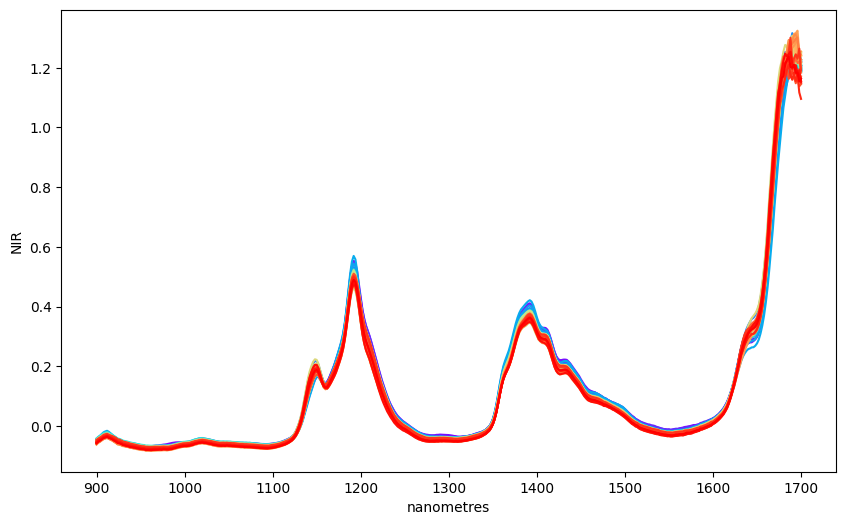

In [91]:
plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, 60))  # Create a rainbow colormap

# Plot the first line
plt.plot(nm, nir.iloc[0, :], color=colors[0], label='1')

# Plot subsequent lines
for i in range(1, 60):
    plt.plot(nm, nir.iloc[i, :], color=colors[i])

plt.ylabel('NIR')
plt.xlabel('nanometres')
plt.show()



## Marginal Regression

In [93]:
predicted_values = []

# For each x variable, run a simple regression and store the predicted values
for x_var in nir.columns:
    X = sm.add_constant(nir[x_var])
    model = sm.OLS(octane, X)
    result = model.fit()
    predicted_values.append(result.fittedvalues)

In [94]:
# Average the predicted values
df_pred = pd.DataFrame(np.mean(predicted_values, axis=0), columns=['ave_pred1'])

In [95]:
#Use the average predicted values as a new regressor
X_new = sm.add_constant(df_pred['ave_pred1'])
model_final = sm.OLS(octane, X_new)
result_final = model_final.fit()
print(result_final.summary())

                            OLS Regression Results                            
Dep. Variable:                 octane   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     25.50
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           4.68e-06
Time:                        09:59:37   Log-Likelihood:                -99.217
No. Observations:                  60   AIC:                             202.4
Df Residuals:                      58   BIC:                             206.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -125.1931     42.052     -2.977      0.0

In [96]:
yhat_mr = result_final.fittedvalues

Text(0.5, 1.0, 'Prediction v.s. True')

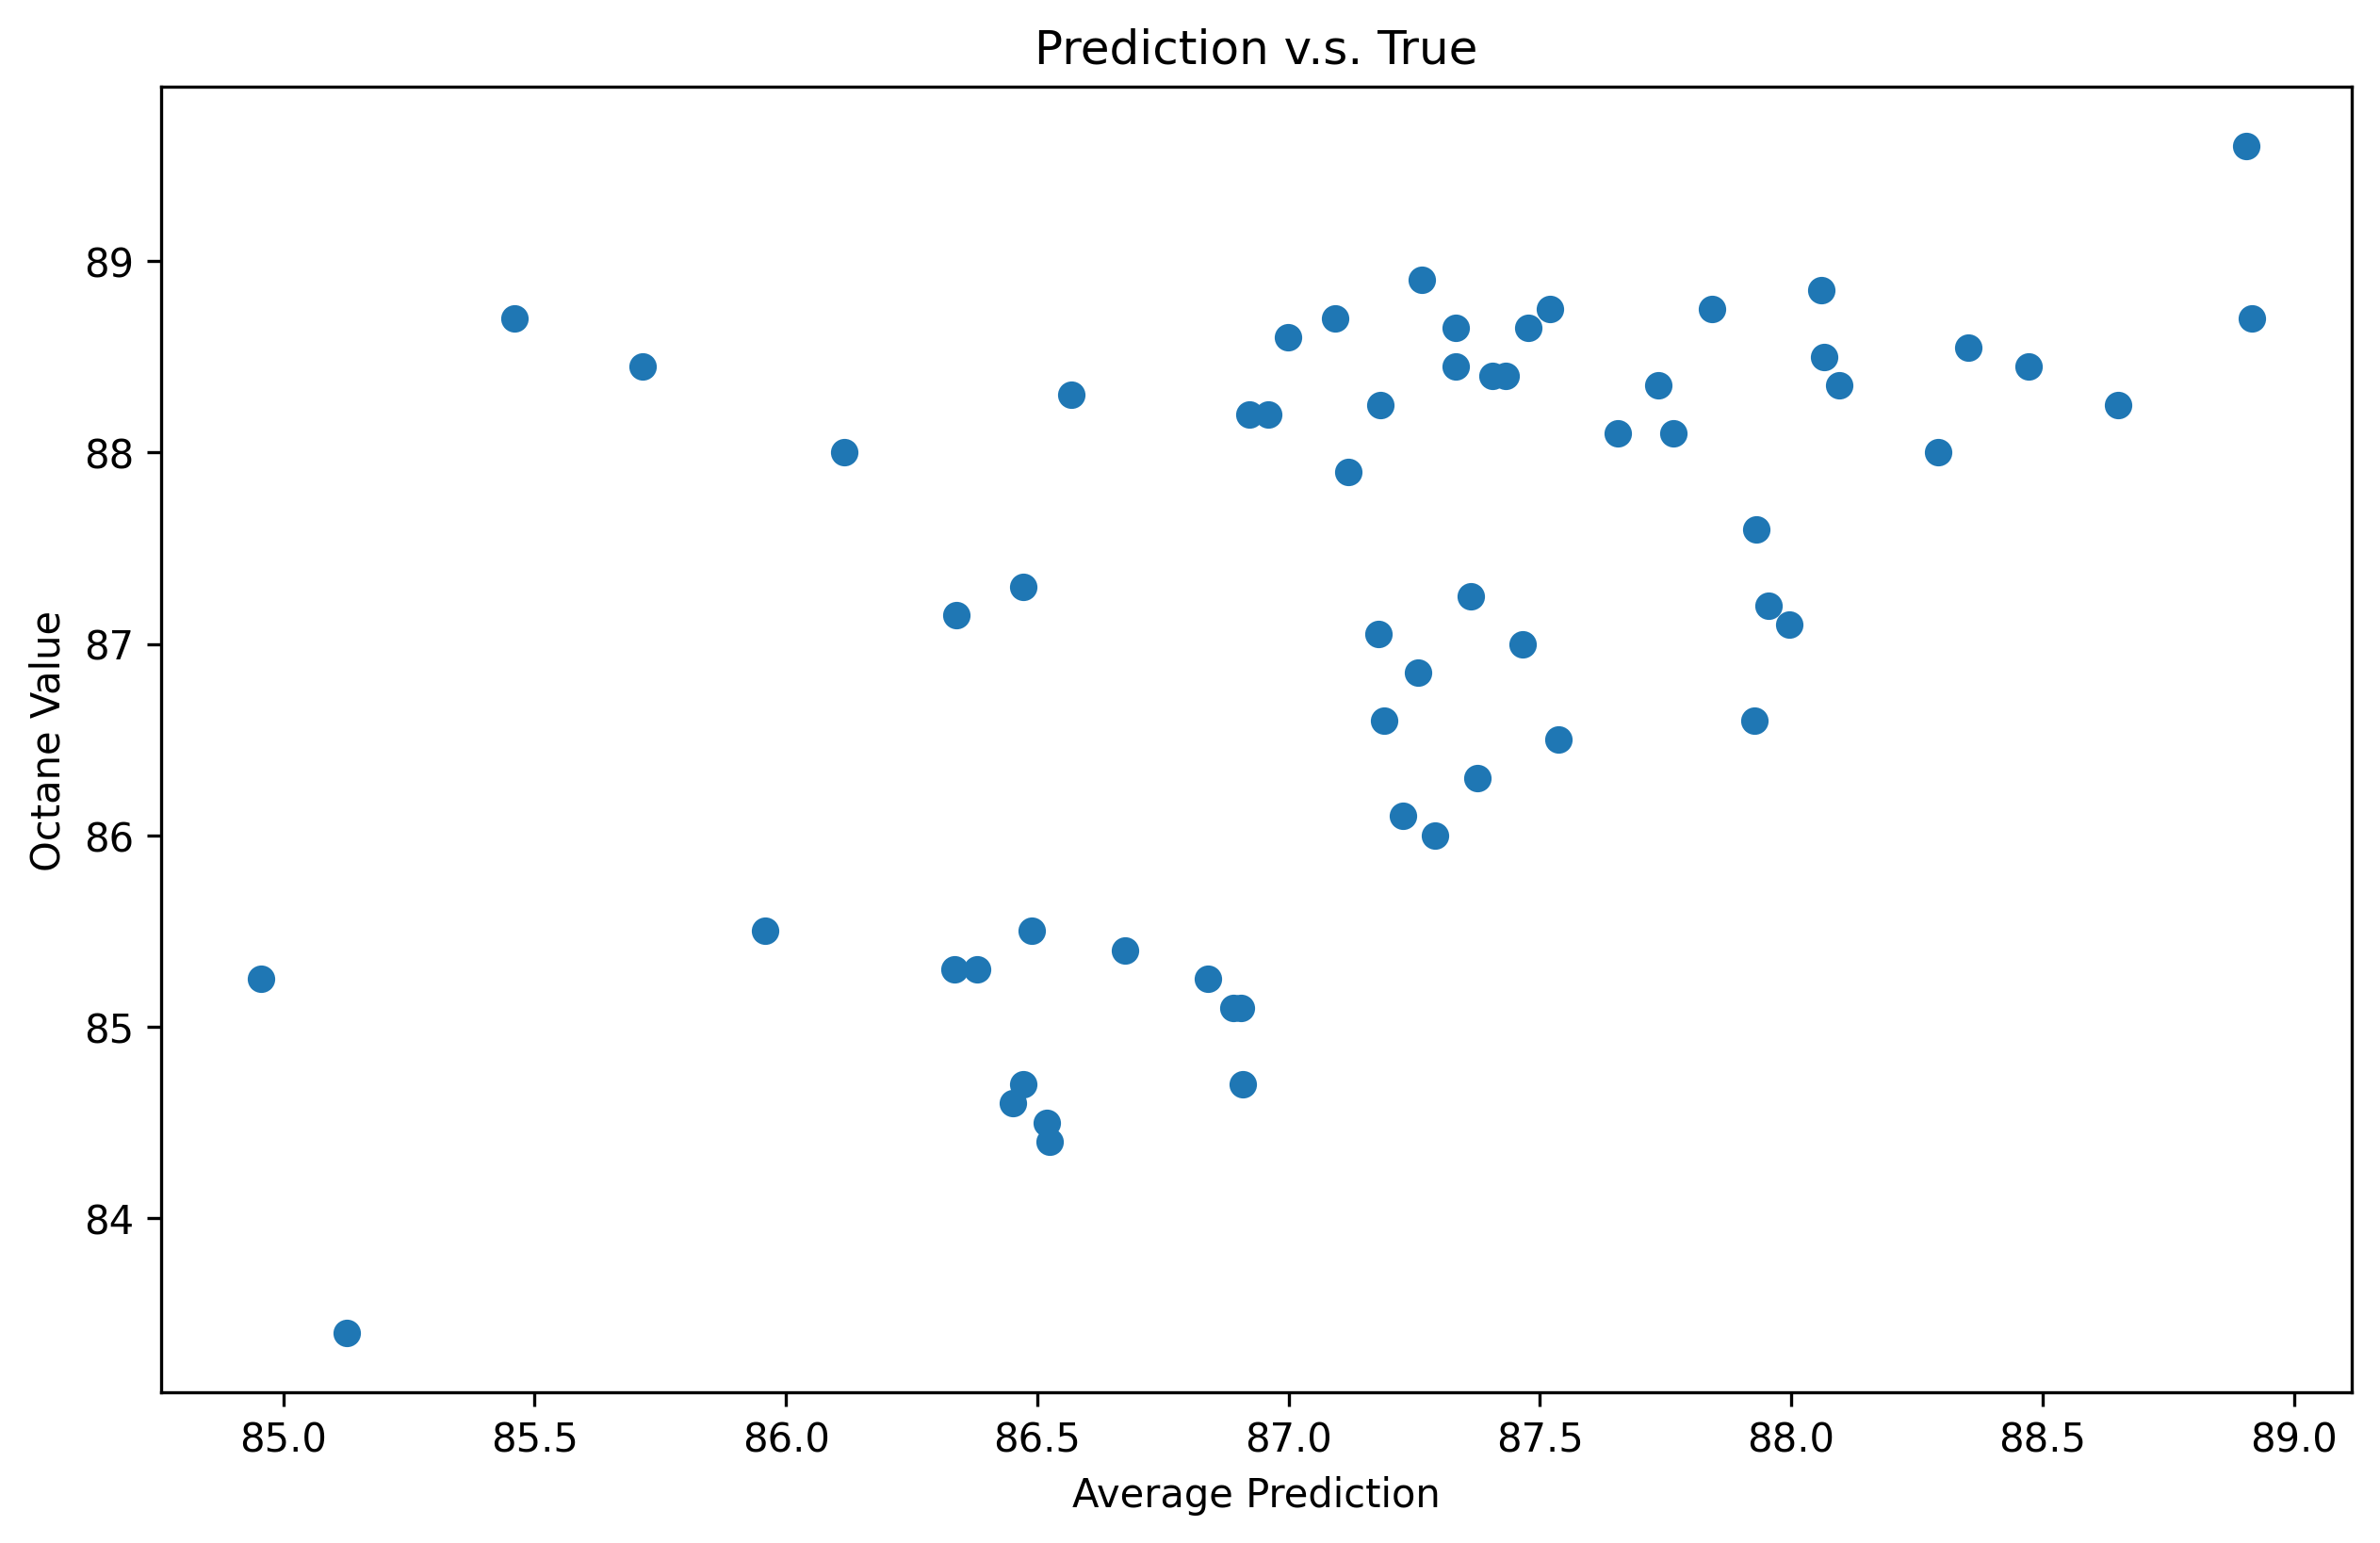

In [97]:
plt.figure(figsize=(10, 6), dpi=300)
scatter = plt.scatter(yhat_mr, octane, marker='o')
plt.xlabel('Average Prediction')
plt.ylabel('Octane Value')
plt.title('Prediction v.s. True')


## Partial Least Squares (PLS)
PLS is repeated MR on its previously obtained residual.

Algorithm 21
1. start MR for $y$ on $x$. Denote the factor as $\nu^1$ and the fitted value $\hat{y}^1$.
1. For the $k$ th iteration, get residuals (from the $k-1$ th step) $\tilde{y}_i^{k-1}= y_i-\hat{y}_i^{k-1}$.
1. Repeat MR but use $\tilde{y}_i^{k-1}$ as the dependent variable.
1. Get new fitted value $\hat{y}^k_i=\hat{y}_i^{k-1}+\beta_k \nu_i^k$.

This idea is called **boosting**. PLS is boosted MR.

In [98]:
pls = PLSRegression(n_components=1)

# Fit the model
pls.fit(nir, octane)

PLSRegression(n_components=1)

In [99]:
yhat = pls.predict(nir)

Text(0.5, 1.0, 'Prediction v.s. True')

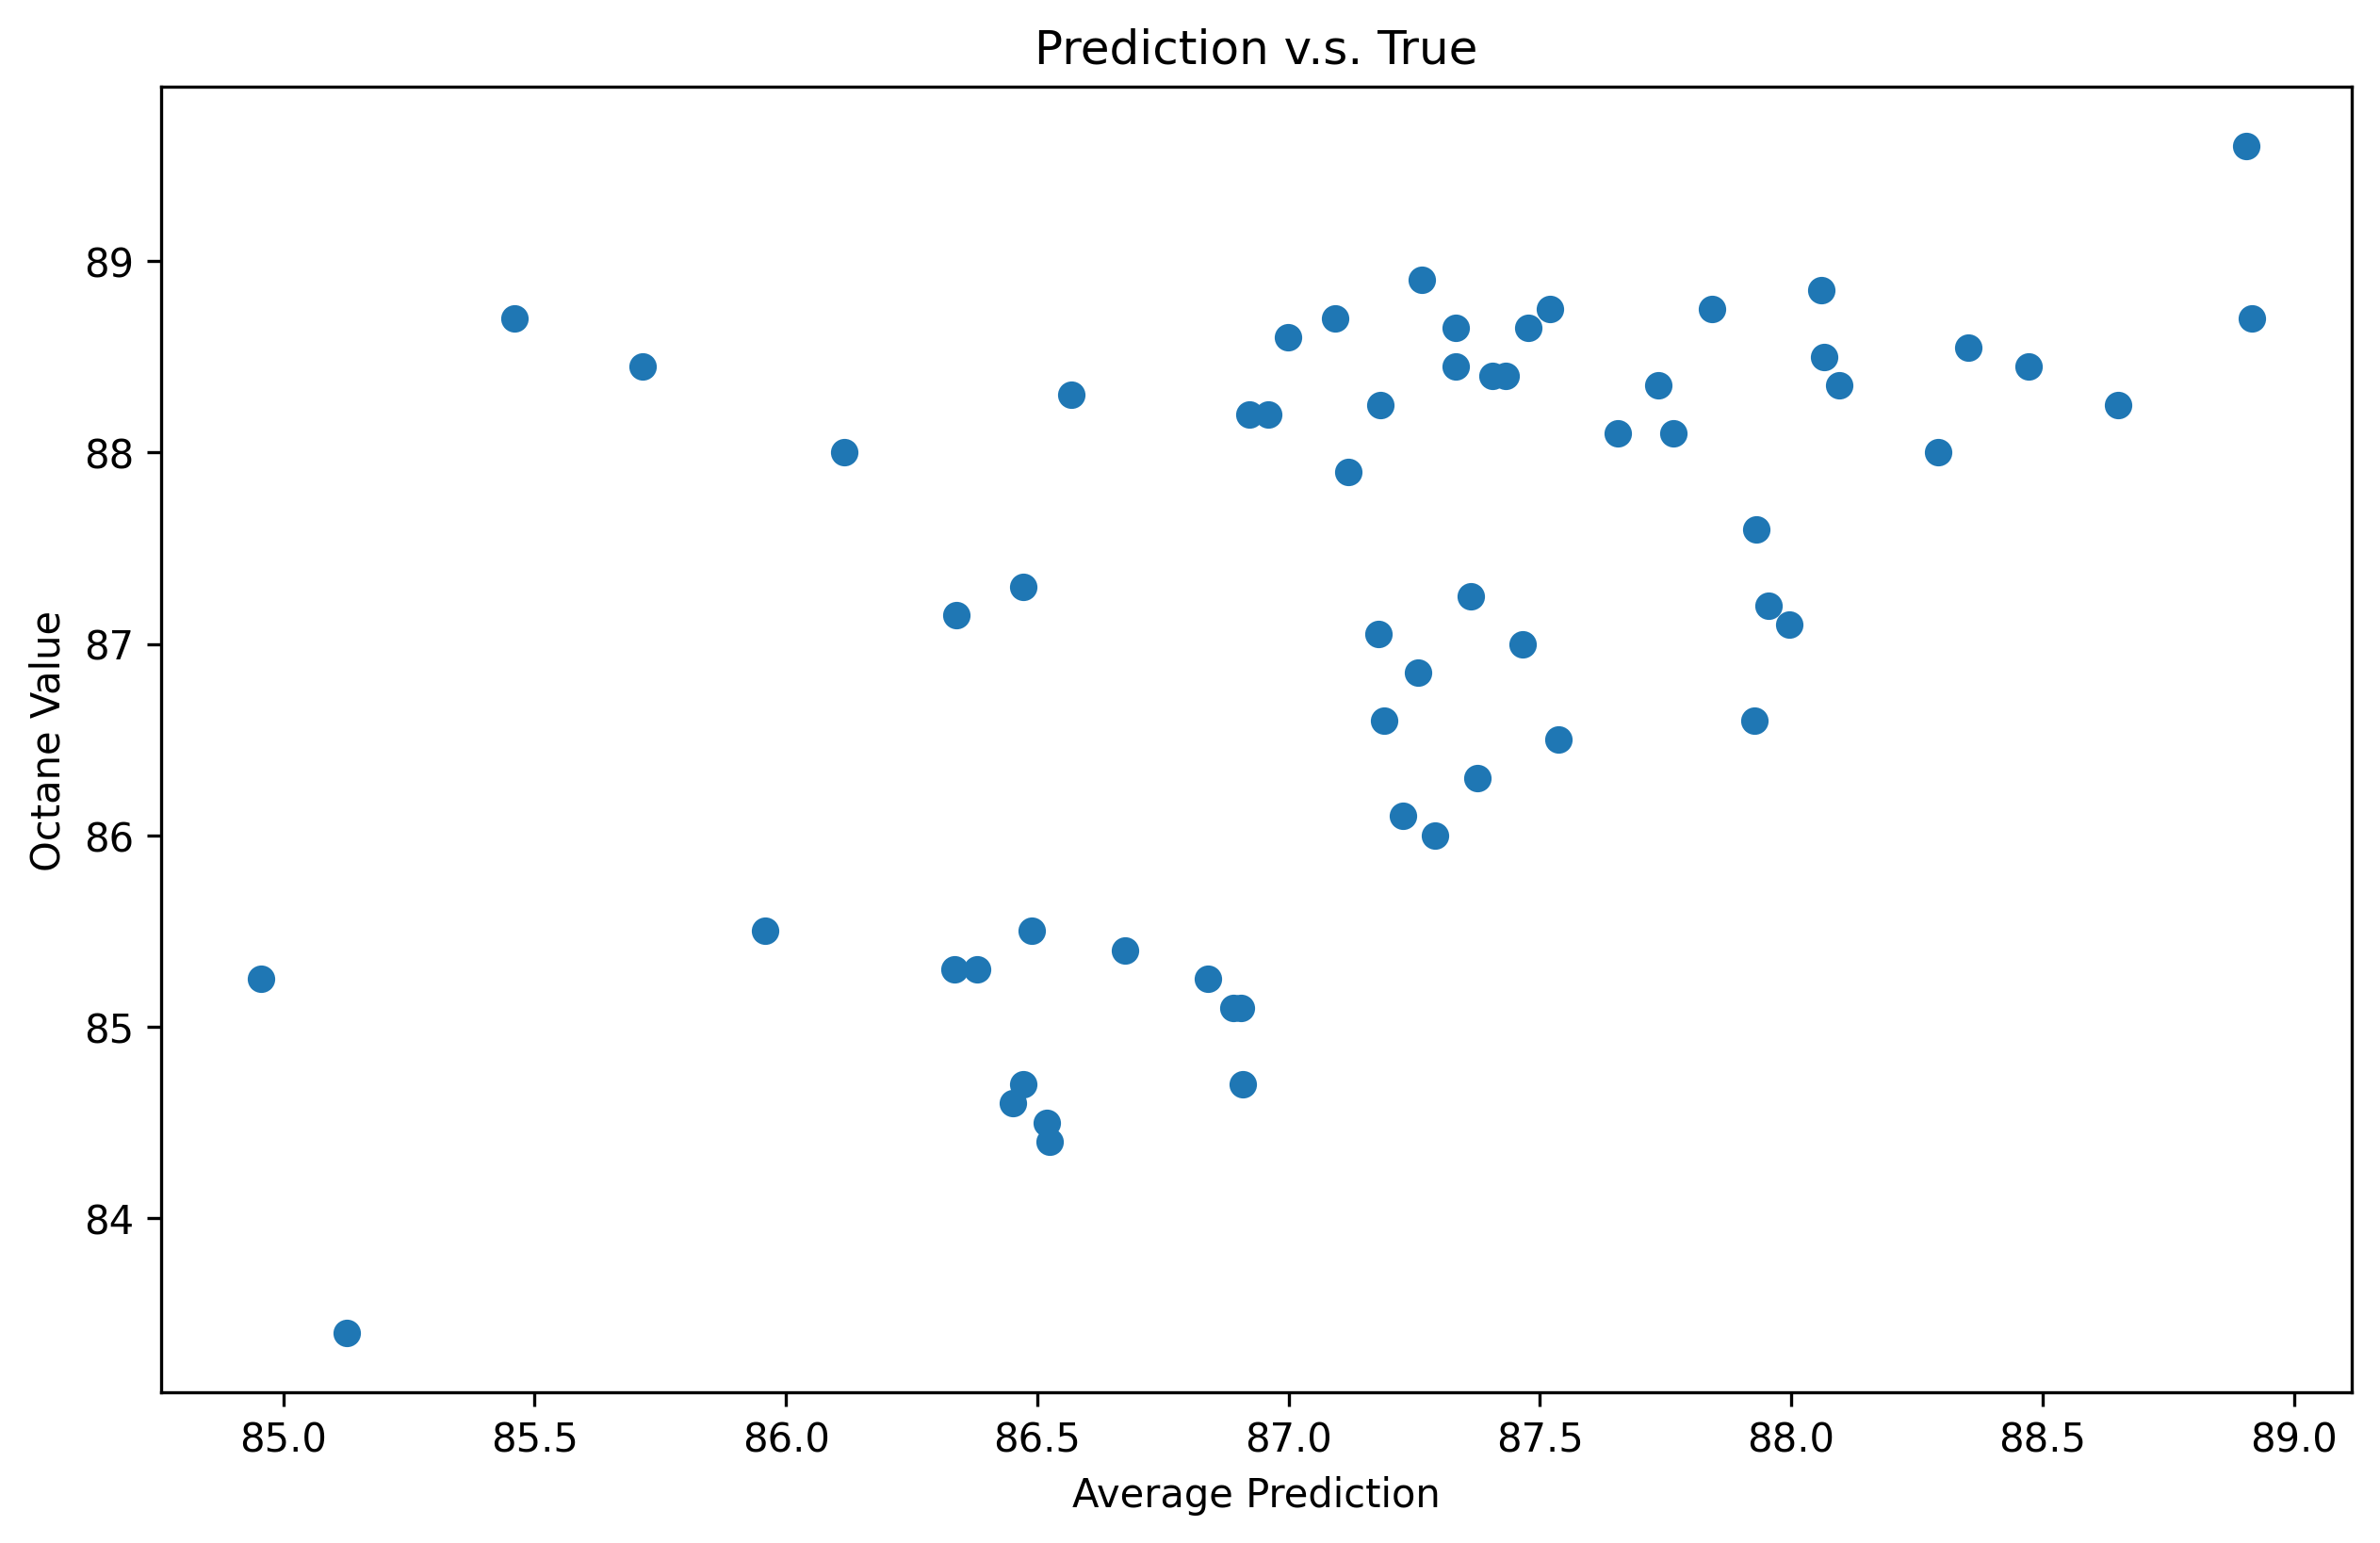

In [100]:
plt.figure(figsize=(10, 6), dpi=300)
scatter = plt.scatter(yhat, octane, marker='o')
plt.xlabel('Average Prediction')
plt.ylabel('Octane Value')
plt.title('Prediction v.s. True')

In [101]:
np.mean(np.abs(yhat.ravel()-yhat_mr))

1.255529014088097e-12

(84.75719740075667, 89.1153964329878)

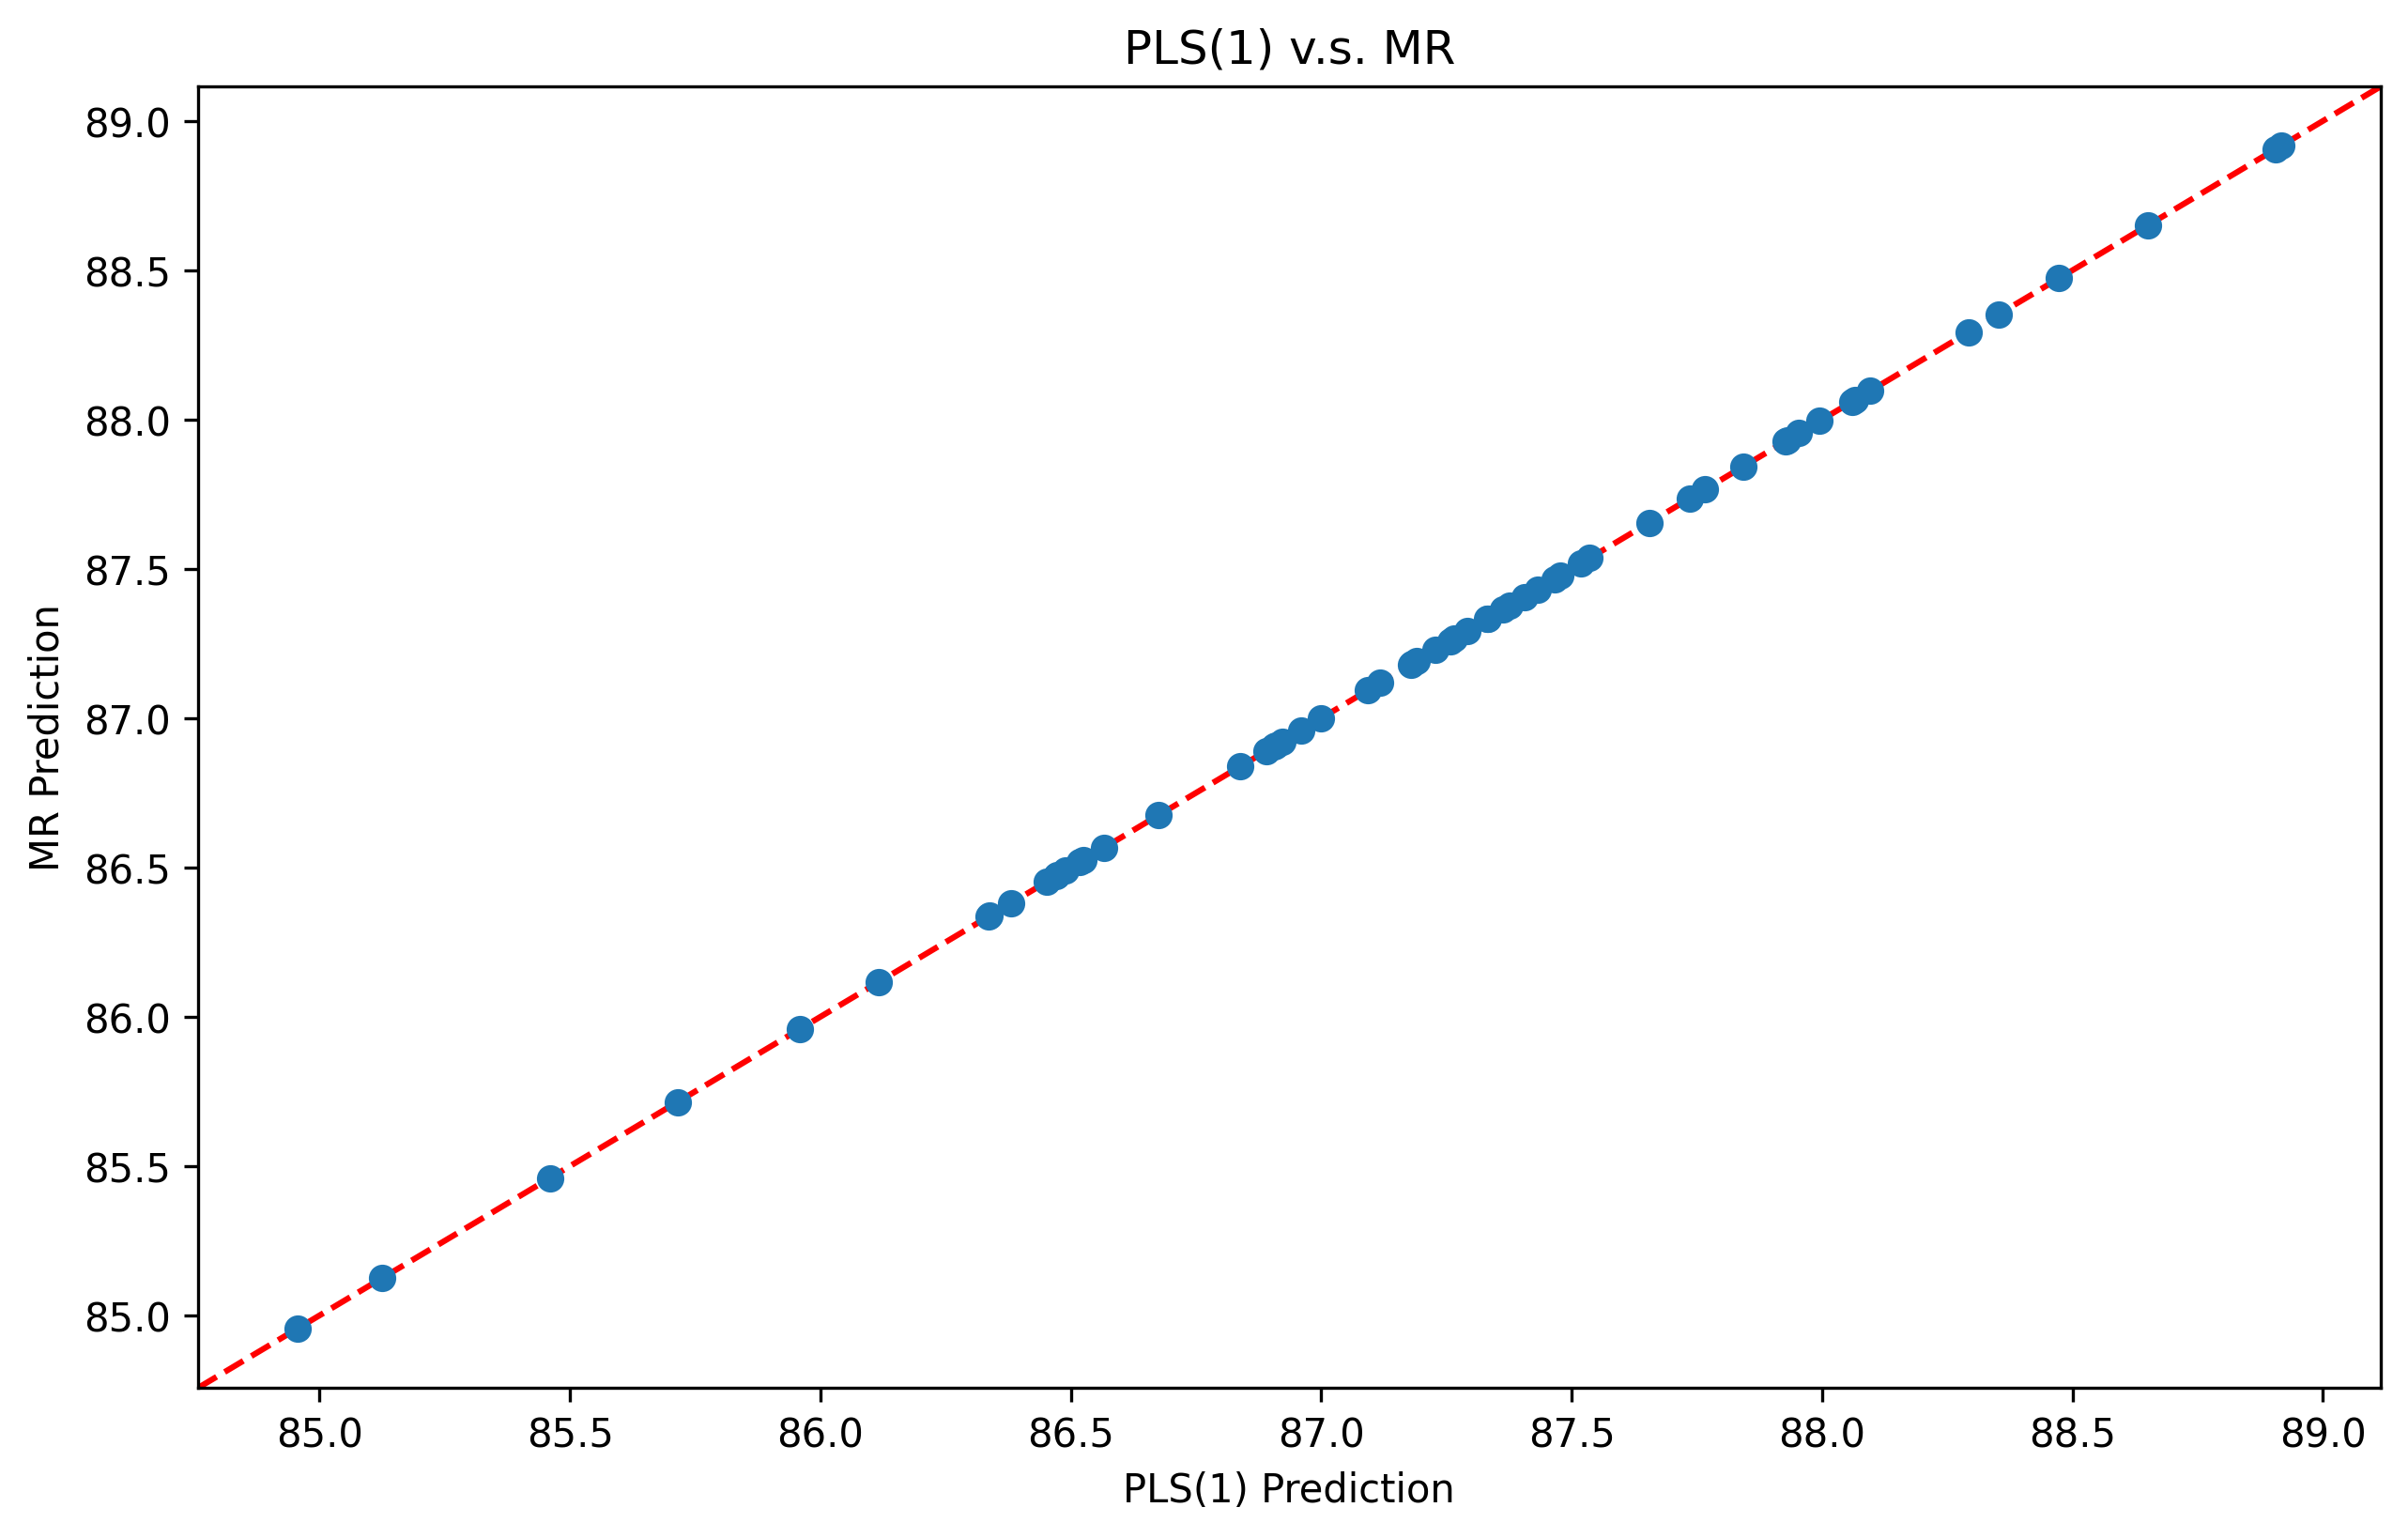

In [102]:
plt.figure(figsize=(10, 6), dpi=300)
scatter = plt.scatter(yhat, yhat_mr, marker='o')
plt.xlabel('PLS(1) Prediction')
plt.ylabel('MR Prediction')
plt.title('PLS(1) v.s. MR')

lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]
plt.plot(lims, lims, color='red', linestyle='--', zorder=0)
plt.xlim(lims)
plt.ylim(lims)

In [103]:
pls = PLSRegression(n_components=1)
pls.fit(nir, octane)
yhat1 = pls.predict(nir)

In [104]:
pls = PLSRegression(n_components=2)
pls.fit(nir, octane)
yhat2 = pls.predict(nir)

In [105]:
pls = PLSRegression(n_components=3)
pls.fit(nir, octane)
yhat3 = pls.predict(nir)

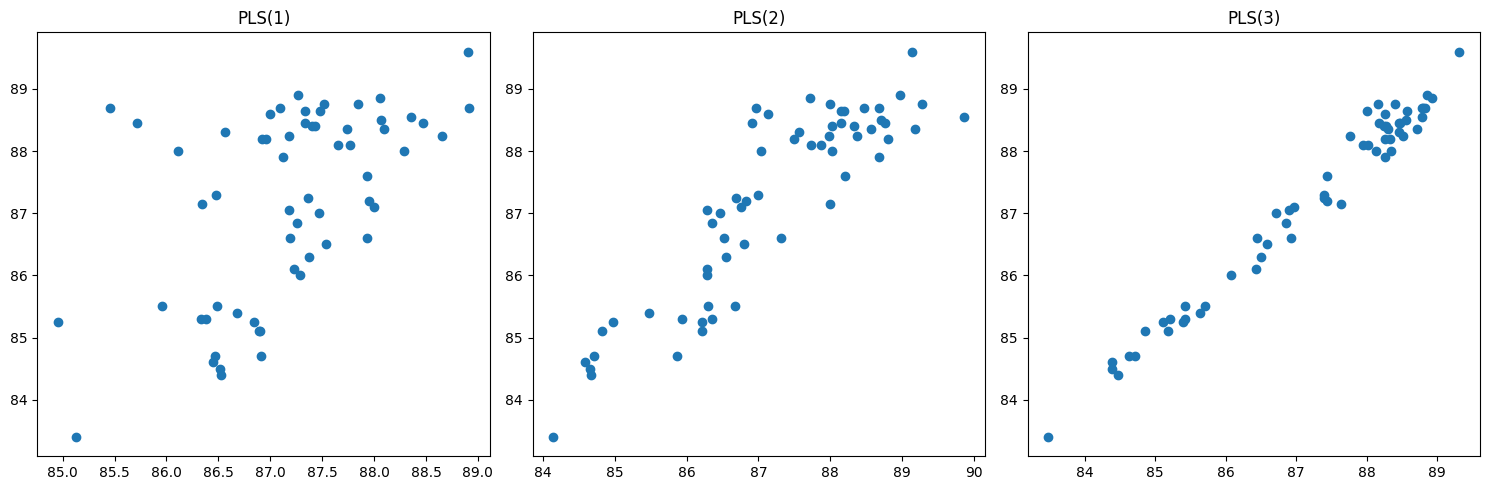

In [106]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Plot X scores
axes[0].scatter(yhat1, octane)
axes[0].set_title('PLS(1)')

# Plot Y scores
axes[1].scatter(yhat2, octane)
axes[1].set_title('PLS(2)')

# Plot X loadings
axes[2].scatter(yhat3, octane)
axes[2].set_title('PLS(3)')

plt.tight_layout()
plt.show()

## Cross-Validation

In [108]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

rmse = []
# Evaluate PLS models with different number of components
max_components = 10
for ii in range(1, max_components + 1):
    pls = PLSRegression(n_components=ii)
    y_cv = cross_val_predict(pls, nir, octane, cv=kf)

    # Calculate RMSE for this CV
    rmse.append(np.sqrt(mean_squared_error(octane, y_cv)))

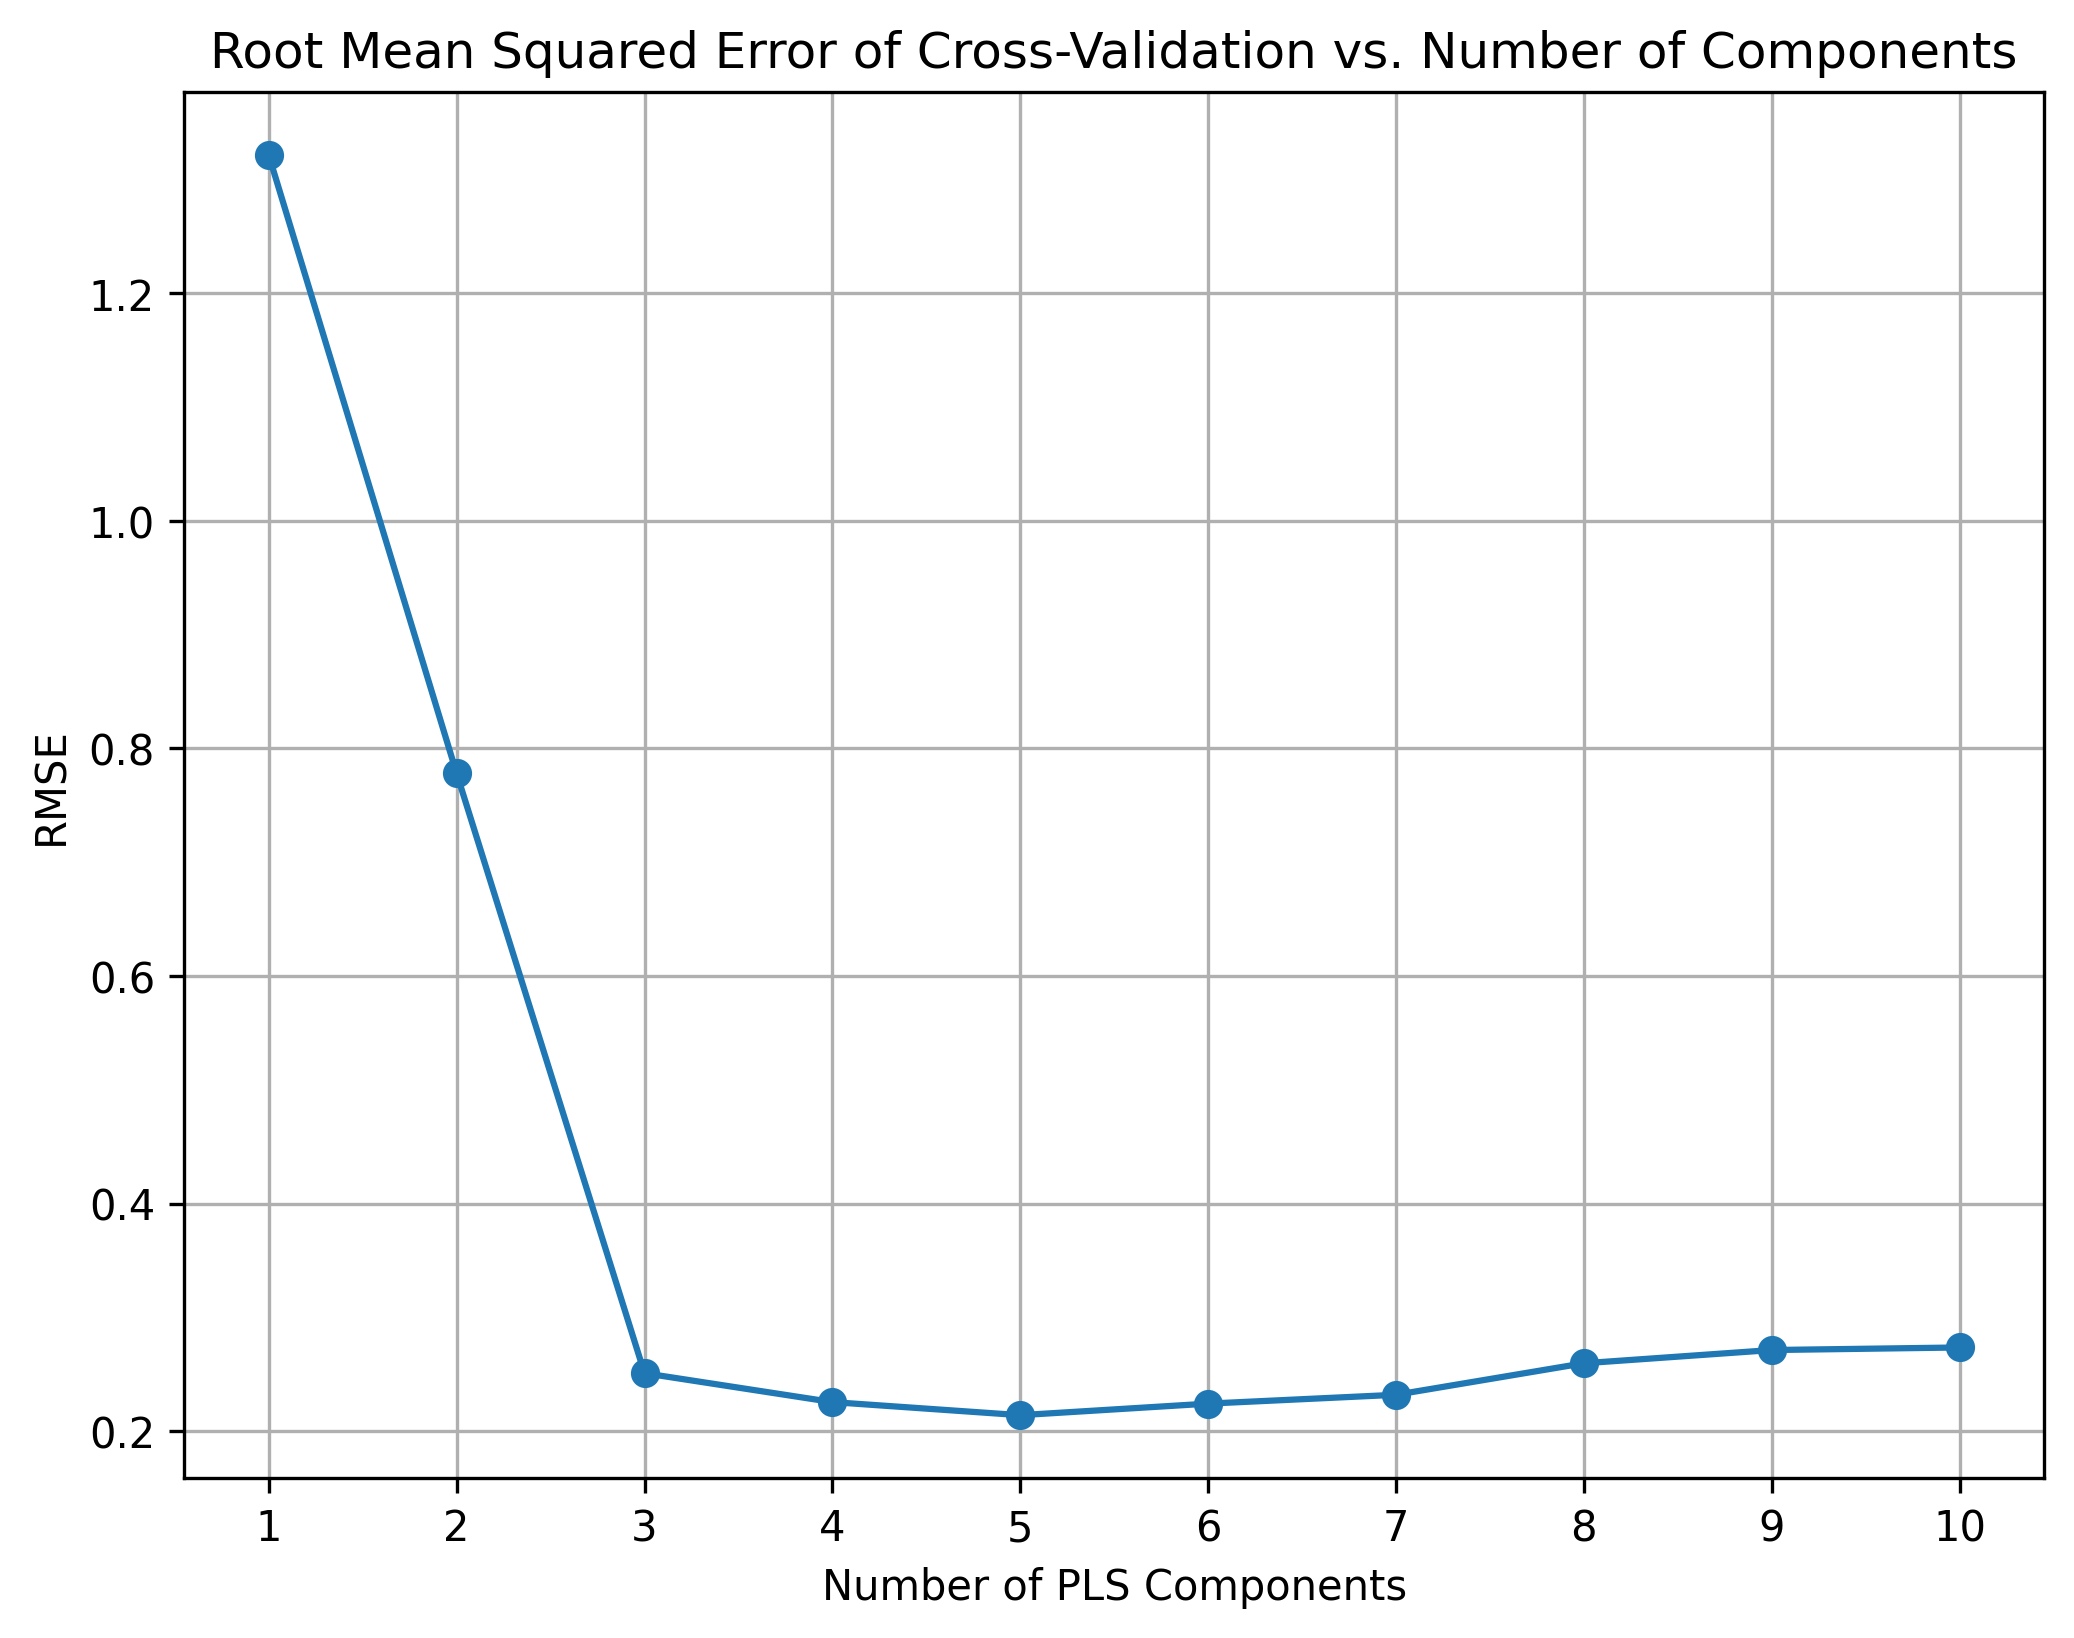

In [109]:
# Plot RMSE to find optimal number of components
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(range(1, max_components + 1), rmse, '-o')
plt.title('Root Mean Squared Error of Cross-Validation vs. Number of Components')
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE')
plt.xticks(range(1, max_components + 1))
plt.grid(True)
plt.show()

In [110]:
optimal_components = np.argmin(rmse) + 1
print(f"Optimal number of components based on RMSECV: {optimal_components}")

Optimal number of components based on RMSECV: 5


# Linear Discriminant Analysis

- reading: Raschka, Liu and Mirjalili (2022) P154-163

- Similar idea as PCA, but it is supervised and used for classification

<img src = "https://www.dropbox.com/scl/fi/vdb33imycl1him9uhtond/LDA.png?rlkey=6ur449ze20lsfpqeyeiocyra6&st=k0ef27v3&dl=1" width=400/>

- y-axis provides more varitioan, and hence it is loved by PCA.
- However, x-axis seprates two classes... that is why we want supervision.
- LDA tries to choose $k$ components to maximise the *between-class* variations among $X$ variables, since we can *observe* these classes.
    - PCA, instead, just to choose $k$ components to maximise variations among $X$ variabels, since it ignores the observables.
    - LDA and PCA both use linear transformation.
    - technique details are in the textbook, but not required.

In [121]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [122]:
df.to_csv('wine.csv', index=False, header=False)

## [Wine Data](https://archive.ics.uci.edu/dataset/109/wine)

Many data are available [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/datasets)

Information from the data provider:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.)  I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline 

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.           





In [126]:
df_wine = pd.read_csv('wine.csv', header=None)

In [127]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [129]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test) ## Attention!!! must use the same transformer in the test data! Otherwise, it is a different thing

In [131]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

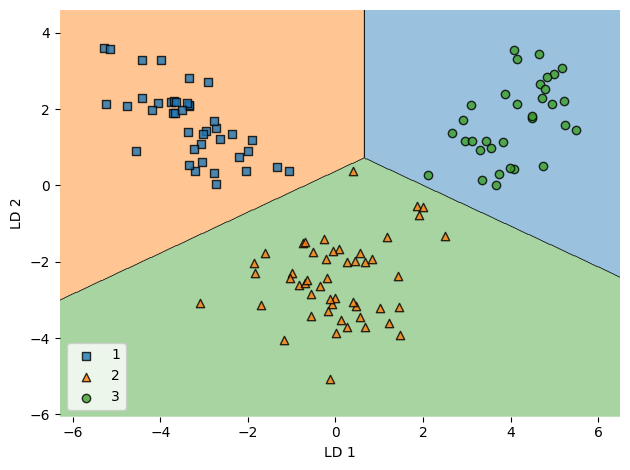

In [138]:
lr = LogisticRegression(random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, clf=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Test Sample

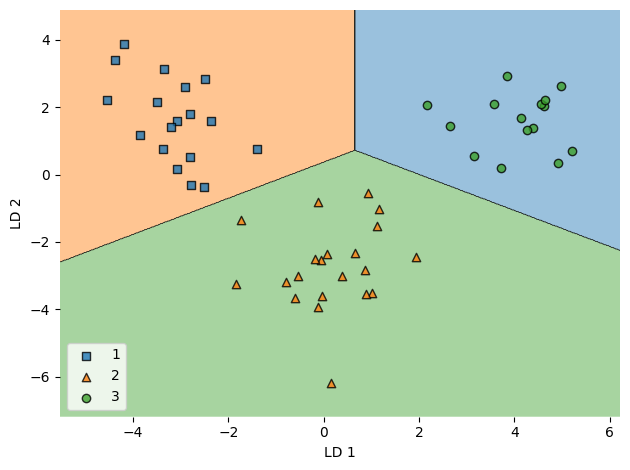

In [139]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, clf=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# End of File